# PREDICT CAR PRICES

## This is a supervised learning regression problem. We are predicting the price of a car, which is a continuous value 

### The dataset has 205 cars with 26 features. 

### Project plan.
    1. Import dependencies
            a. Data analysis and manupulation dependencies
            b. Models
    2. Set global variables
    3. Exploratory Data Analysis
    4. Data Cleaning
    5. Feature Selection
    6. Model selection
    7. Hyperparameter Optimization
    8. Model Testing
    9. Model Deployment

### Import Dependencies

#### Data analyis dependencies

In [1]:
# this will provide the functions for interacting with the operating system
import os

# Import data analysis libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Import accuracy and loss function metrics for model augmentation
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt


#### Import models

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
# Being a regression problem, LinearRegression will come in handy
from sklearn.linear_model import LinearRegression
# DecisionTreeClassifier is also good in Regression problems
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

# Import the spliting paradigm of data for training and testing
from sklearn.model_selection import train_test_split, cross_val_score
# import GridSearchCV and RandomizedSearchCV for hyperparameter optimization/ tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



### Set Global variables

In [3]:
# Dataframes should display maximum columns for visibility
pd.set_option('display.max_columns', None)
# Set the size of seaborn plots so that they are more clear and visible
sns.set(rc={'figure.figsize': (12, 10)})
sns.set_style('darkgrid', {'grid.color': 'red'})
# Remove the annoying warnings
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning) 

### Load the dataset

In [4]:
cars_data = pd.read_csv(r"C:\Users\Scofield\MACHINE LEARNING PROJECTS\Car Price Prediction Model\cars_data.csv")

cars_data.shape

(205, 26)

# Exploratory data analysis

#### Get the first 5 rows of the dataset transposed(T)

In [5]:
cars_data.head().T

0                    1  \
car_ID                             1                    2   
symboling                          3                    3   
CarName           alfa-romero giulia  alfa-romero stelvio   
fueltype                         gas                  gas   
aspiration                       std                  std   
doornumber                       two                  two   
carbody                  convertible          convertible   
drivewheel                       rwd                  rwd   
enginelocation                 front                front   
wheelbase                       88.6                 88.6   
carlength                      168.8                168.8   
carwidth                        64.1                 64.1   
carheight                       48.8                 48.8   
curbweight                      2548                 2548   
enginetype                      dohc                 dohc   
cylindernumber                  four                 four   
enginesize                       130                  130   
fuelsystem                      mpfi                 mpfi   
boreratio                       3.47                 3.47   
stroke                          2.68                 2.68   
compressionratio                   9                    9   
horsepower                       111                  111   
peakrpm                         5000                 5000   
citympg                           21                   21   
highwaympg                        27                   27   
price                          13495                16500   

                                         2            3           4  
car_ID                                   3            4           5  
symboling                                1            2           2  
CarName           alfa-romero Quadrifoglio  audi 100 ls  audi 100ls  
fueltype                               gas          gas         gas  
aspiration                             std          std         std  
doornumber                             two         four        four  
carbody                          hatchback        sedan       sedan  
drivewheel                             rwd          fwd         4wd  
enginelocation                       front        front       front  
wheelbase                             94.5         99.8        99.4  
carlength                            171.2        176.6       176.6  
carwidth                              65.5         66.2        66.4  
carheight                             52.4         54.3        54.3  
curbweight                            2823         2337        2824  
enginetype                            ohcv          ohc         ohc  
cylindernumber                         six         four        five  
enginesize                             152          109         136  
fuelsystem                            mpfi         mpfi        mpfi  
boreratio                             2.68         3.19        3.19  
stroke                                3.47          3.4         3.4  
compressionratio                         9           10           8  
horsepower                             154          102         115  
peakrpm                               5000         5500        5500  
citympg                                 19           24          18  
highwaympg                              26           30          22  
price                                16500        13950       17450

#### Get all the columns of the dataset 

In [6]:
for all_the_columns in cars_data.columns:
    print(all_the_columns)

car_ID
symboling
CarName
fueltype
aspiration
doornumber
carbody
drivewheel
enginelocation
wheelbase
carlength
carwidth
carheight
curbweight
enginetype
cylindernumber
enginesize
fuelsystem
boreratio
stroke
compressionratio
horsepower
peakrpm
citympg
highwaympg
price


#### Get the features data types and number of feature values that are not null

In [7]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### 16 columns are integers or floats while 10 columns are objects. 

#### We need to know all variables in each column

In [8]:
# we want to investigate all the elements within each feature

for column in cars_data:
    unique_values = np.unique(cars_data[column])
    number_of_column_features = len(unique_values)
    if number_of_column_features < 10:
        print('number of values for  {} : {} ------ {}' .format(column,  number_of_column_features, unique_values))
        
    else:
        print('The number of values for {} : {}' . format(column, number_of_column_features))

The number of values for car_ID : 205
number of values for  symboling : 6 ------ [-2 -1  0  1  2  3]
The number of values for CarName : 147
number of values for  fueltype : 2 ------ ['diesel' 'gas']
number of values for  aspiration : 2 ------ ['std' 'turbo']
number of values for  doornumber : 2 ------ ['four' 'two']
number of values for  carbody : 5 ------ ['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']
number of values for  drivewheel : 3 ------ ['4wd' 'fwd' 'rwd']
number of values for  enginelocation : 2 ------ ['front' 'rear']
The number of values for wheelbase : 53
The number of values for carlength : 75
The number of values for carwidth : 44
The number of values for carheight : 49
The number of values for curbweight : 171
number of values for  enginetype : 7 ------ ['dohc' 'dohcv' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor']
number of values for  cylindernumber : 7 ------ ['eight' 'five' 'four' 'six' 'three' 'twelve' 'two']
The number of values for enginesize : 44
number of values for  

##### We can see that doornumber and cylinder number needs to be changed to integers

#### Check of we have any missing values in our dataset

In [9]:
# lets check for null values
cars_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

##### We dont have any missing value in our dataset

#### Check the features relationships with seaborn pairplots

C:\Users\Scofield\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


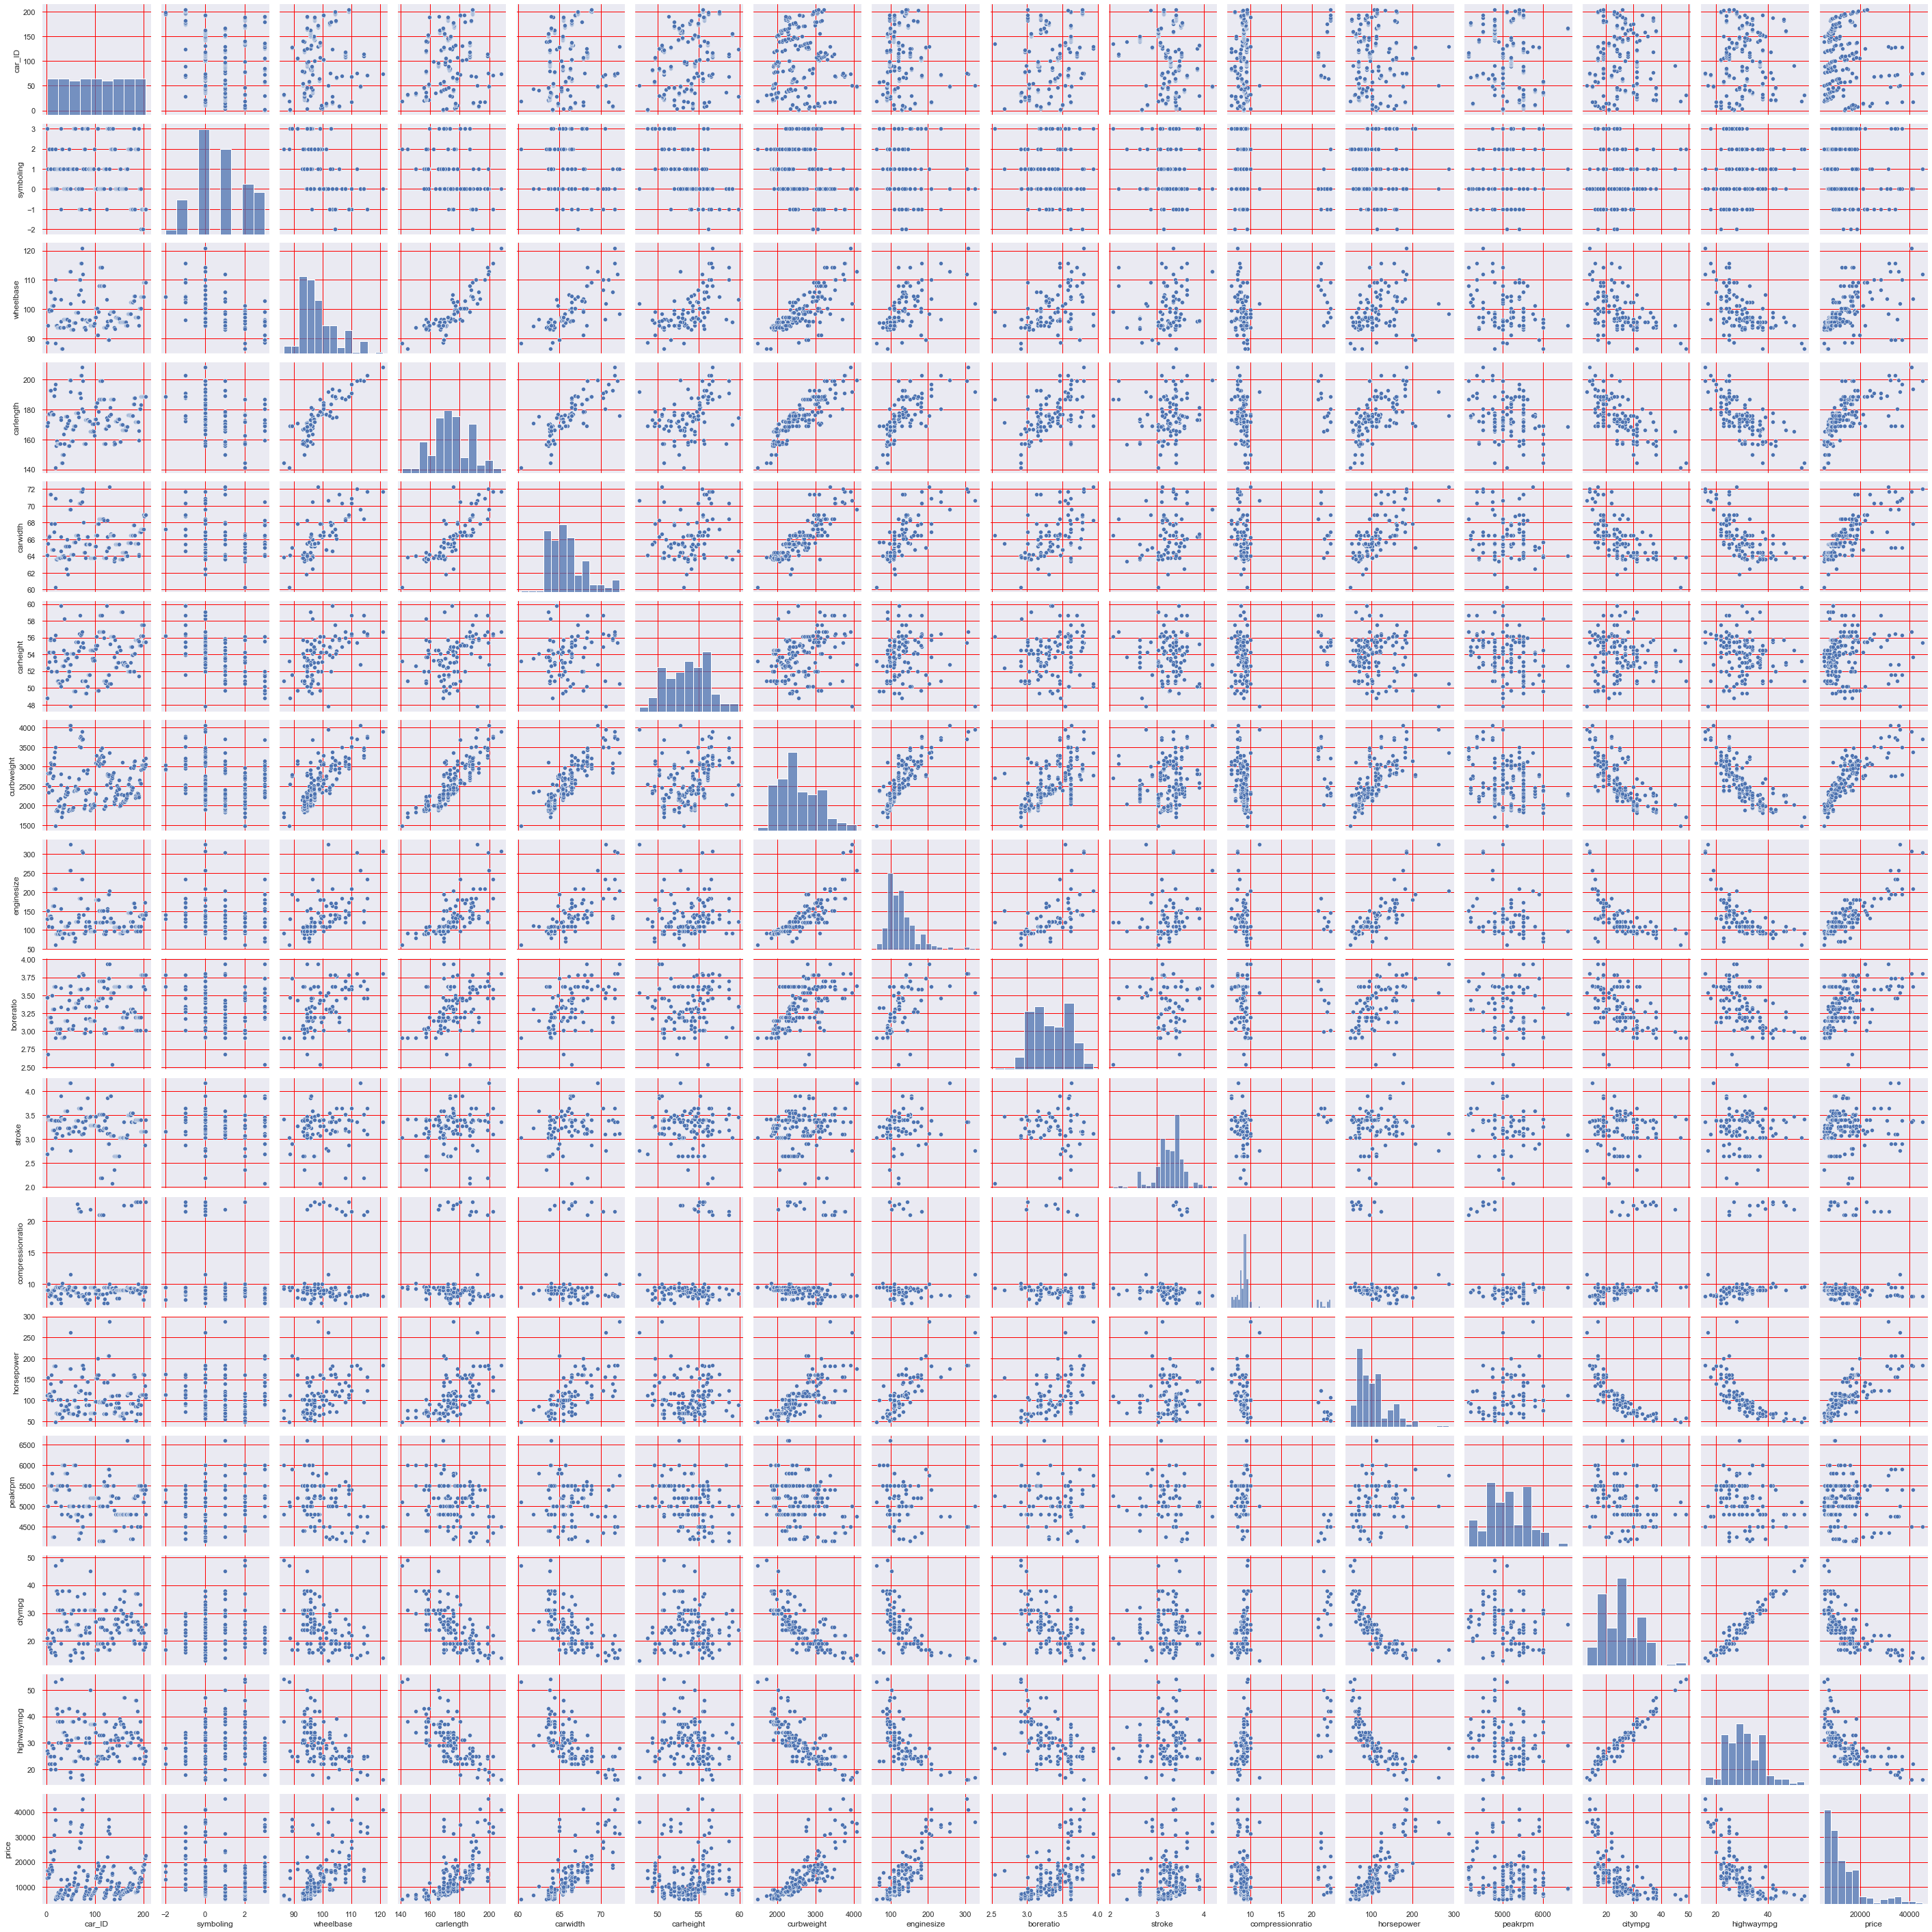

In [10]:
# Investigate all the numeric values with scatter plot
scatters =sns.pairplot( cars_data)
scatters

#### carlength, carwidth, curbweight, enginesize, horsepower, citympg and drivewheel are so far showing a better (strong dependency)relationship with the price of a car

C:\Users\Scofield\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


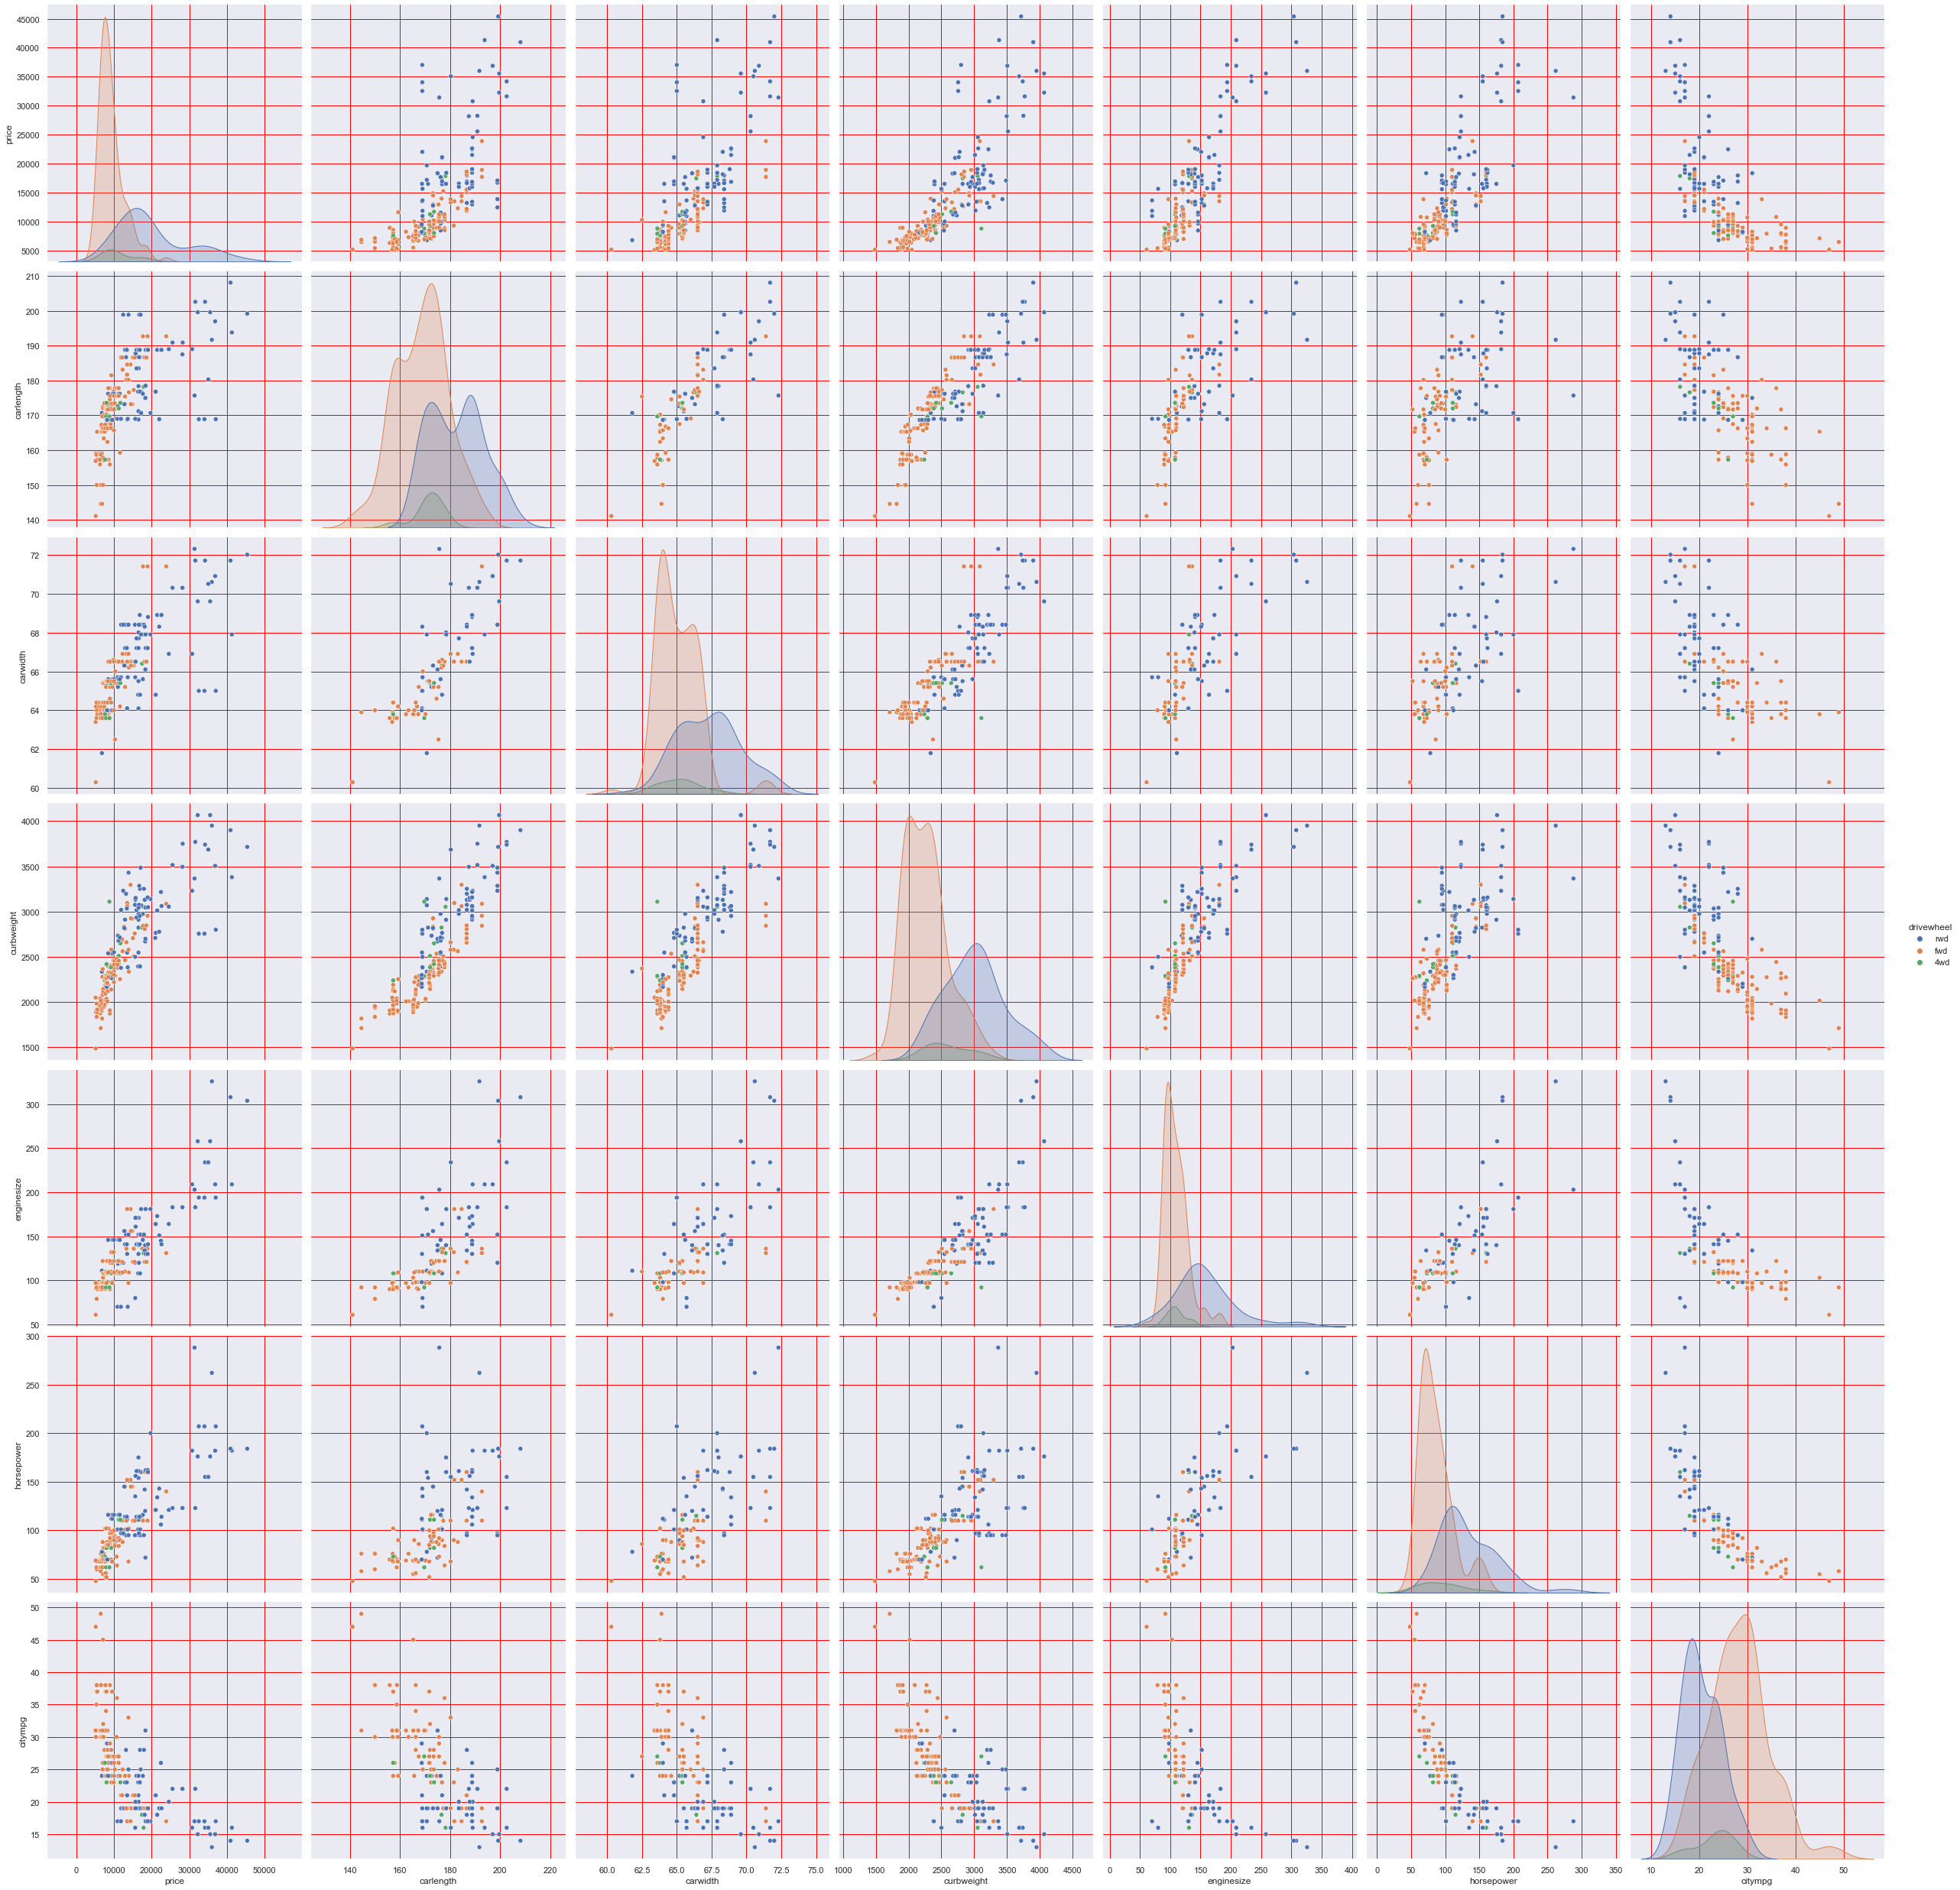

In [11]:
scatters = sns.pairplot(cars_data[['price','carlength', 'carwidth', 'curbweight','enginesize', 'horsepower','citympg', 'drivewheel']], hue='drivewheel', height=5)
scatters

#### From the above data, we can conclude the following

#### The most expencive cars are reardrive cars with:
	1. Low citympg
	2. High horsepower
	3. Big engine size
	4. High curbweight
	5. High car length
	6. High car width

#### Add a regression line to the above pairplots to see the trends clearly

C:\Users\Scofield\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


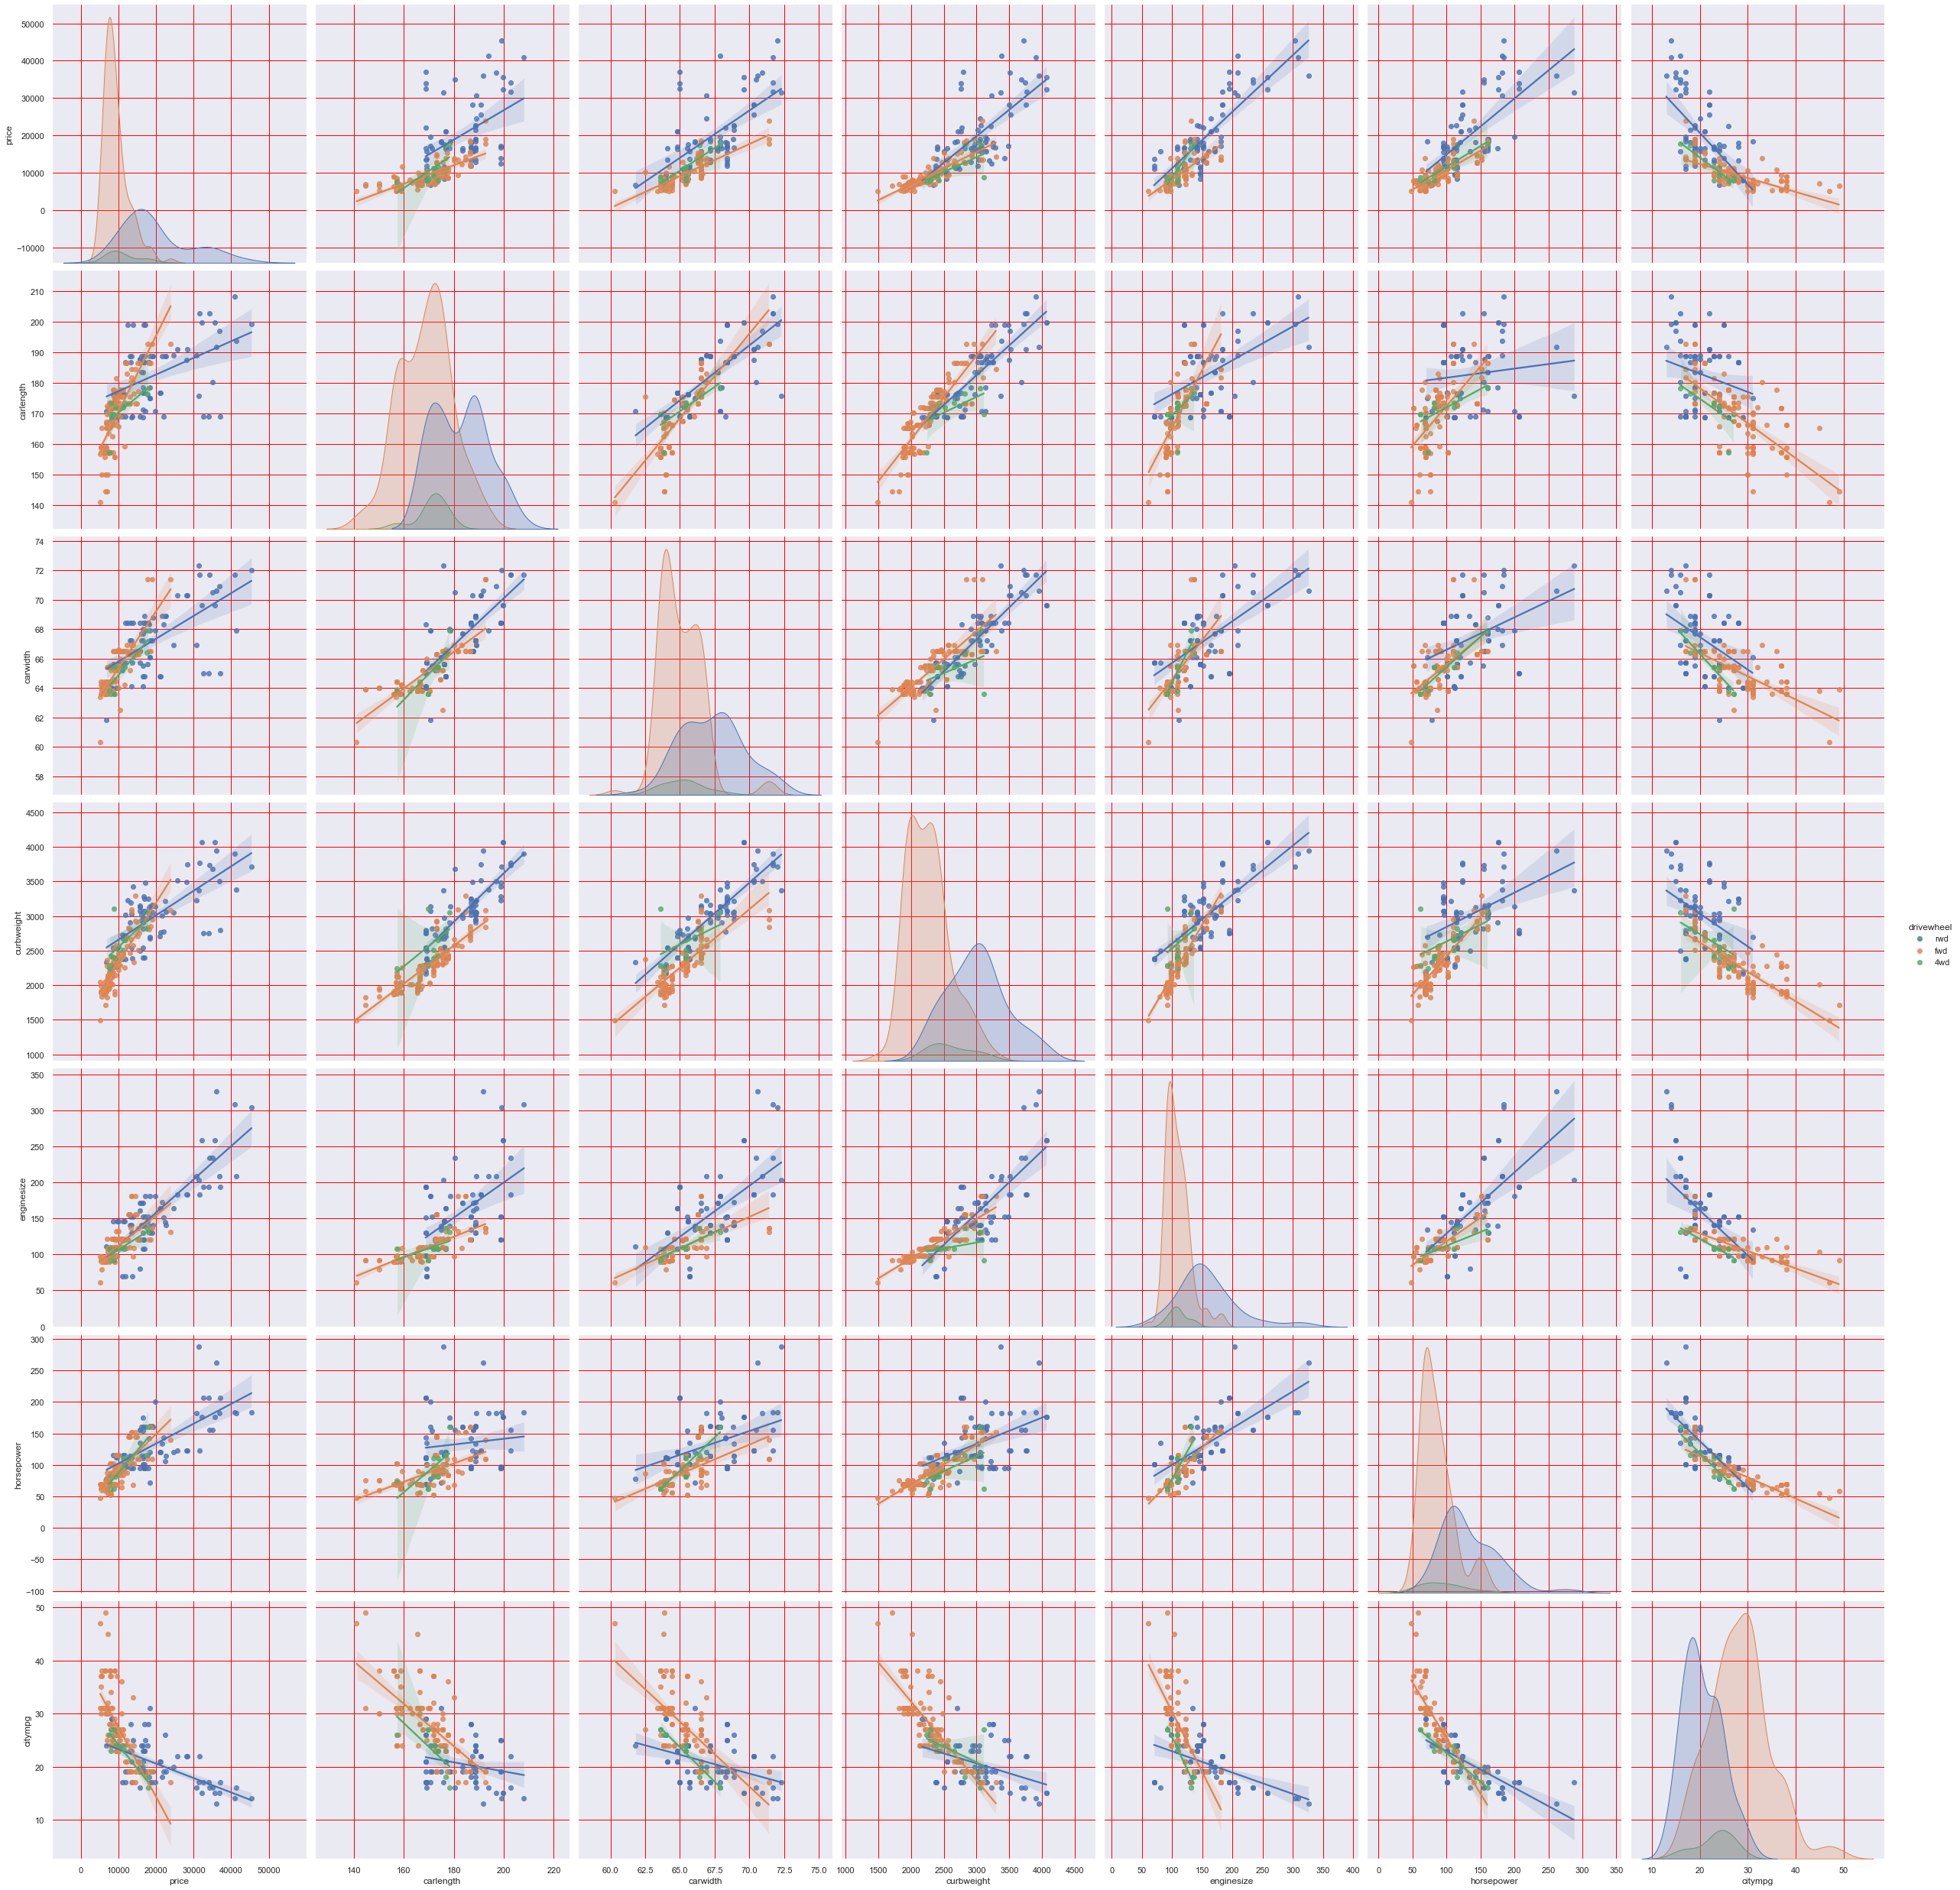

In [12]:
scatters = sns.pairplot(cars_data[['price','carlength', 'carwidth', 'curbweight','enginesize', 'horsepower','citympg', 'drivewheel']], hue='drivewheel', height=5, kind='reg')
scatters

#### Check the fuel economy effect on prices by investigating horsepower and citympg

#### Horsepower

<Axes: xlabel='horsepower', ylabel='price'>

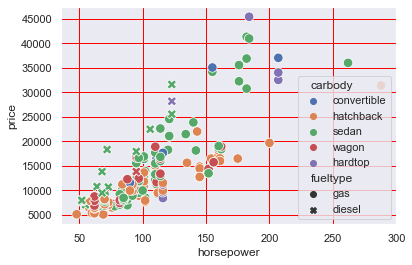

In [13]:
# investigate the relationship between price and horsepower by carbody 
price_vs_horsepower = sns.scatterplot(x='horsepower', y='price', hue='carbody', data=cars_data, color='green', style='fueltype', s=90)
price_vs_horsepower

#### All cars with low horsepower tend to have low prices compared to the ones with high horsepower.
#### Gas powered hatchbacks have the lowest price to horsepower ratio.
#### Diesel powered sedans have the highest price to horsepower ratio.

#### Citympg

<Axes: xlabel='citympg', ylabel='price'>

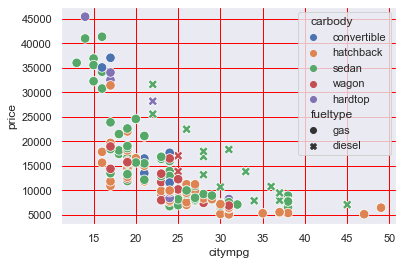

In [14]:
# investigate the relationship between price and citympg by carbody 
price_vs_citympg = sns.scatterplot(x='citympg', y='price', hue='carbody', data=cars_data, color='green', style='fueltype', s=90 )
price_vs_citympg

### Diesel cars generaly have a higher citympg than gas powered ones and hence are more expensive. 

### INVESTIGATING CATEGORICAL DATA

### We have 9 categorical columns.
#### 1. carbody ->		'convertible' 'hardtop' 'hatchback' 'sedan' 'wagon'
#### 2. fueltype	 ->		'diesel' 'gas'
#### 3. aspiration  ->		'std' 'turbo'
#### 4. doornumber  ->		'four' 'two'
#### 5. drivewheel  ->		'4wd' 'fwd' 'rwd'
#### 6. enginelocation	 ->	 'front' 'rear'
#### 7. enginetype  ->		'dohc' 'dohcv' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor'
#### 8. fuelsystem  ->		'1bbl' '2bbl' '4bbl' 'idi' 'mfi' 'mpfi' 'spdi' 'spfi'
#### 9. cylindernumber  ->		'eight' 'five' 'four' 'six' 'three' 'twelve' 'two'

### We shall assign weights to various categories by dividing the bar value by 1,000 to 2 decimal places

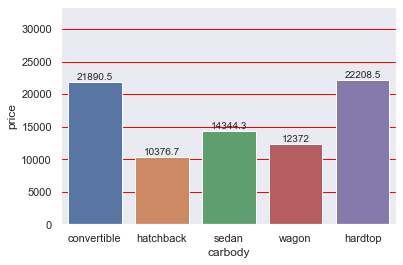

In [15]:
# investigating categorical data
carbody_data = sns.barplot(x="carbody", y="price", data=cars_data, errwidth=0)

for i in carbody_data.containers:
    carbody_data.bar_label(i, )

### carbody

#### convertible  -> 21.89
#### hardtop -> 22.21
#### hatchback -> 10.38
#### sedan -> 14.34
#### wagon -> 12.37

In [16]:
cars_data['carbody'].replace({'convertible':21.89, 'hardtop':22.21, 'hatchback':10.38, 'sedan':14.34, 'wagon':12.37} ,inplace=True)

#### investigating fueltype categorical data

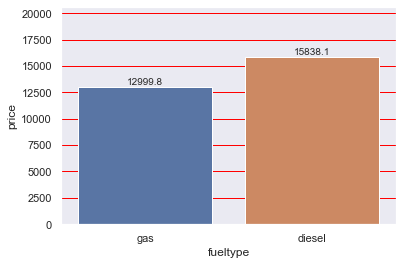

In [17]:

fueltype_data = sns.barplot(x="fueltype", y="price", data=cars_data, errwidth=0)

for i in fueltype_data.containers:
    fueltype_data.bar_label(i, )

## fueltype

#### gas  -> 13.00
#### diesel -> 15.84

In [18]:
cars_data['fueltype'].replace({'gas':13.00, 'diesel':15.84} ,inplace=True)

#### investigating aspiration categorical data

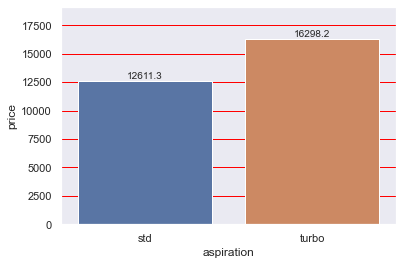

In [19]:
# investigating categorical data
aspiration_data = sns.barplot(x="aspiration", y="price", data=cars_data, errwidth=0)
for i in aspiration_data.containers:
    aspiration_data.bar_label(i, )

## aspiration

#### std  -> 12.61
#### turbo -> 12.30

In [20]:
cars_data['aspiration'].replace({'std':12.61, 'turbo':12.30} ,inplace=True)

#### investigating doornumber categorical data

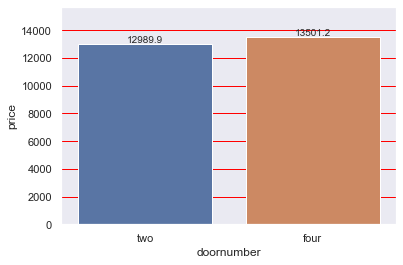

In [21]:

doornumber_data = sns.barplot(x="doornumber", y="price", data=cars_data, errwidth=0)
for i in doornumber_data.containers:
    doornumber_data.bar_label(i, )

### doornumber

#### two  -> 12.99
#### four -> 13.50

In [22]:
cars_data['doornumber'].replace({'two':12.99, 'four':13.50} ,inplace=True)

#### investigating drivewheel categorical data

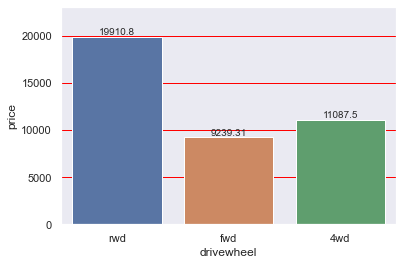

In [23]:
# investigating categorical data
drivewheel_data = sns.barplot(x="drivewheel", y="price", data=cars_data, errwidth=0)
for i in drivewheel_data.containers:
    drivewheel_data.bar_label(i, )

### drivewheel

#### rwd  -> 19.91
#### fwd -> 9.24
#### 4wd -> 11.09

In [24]:
cars_data['drivewheel'].replace({'rwd':19.91, 'fwd':9.24, '4wd':11.09} ,inplace=True)

#### investigating enginelocation categorical data

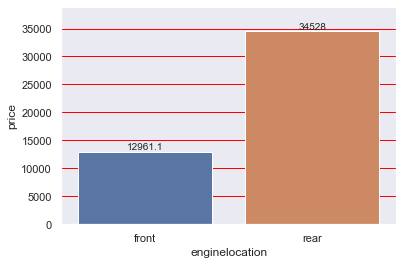

In [25]:

enginelocation_data = sns.barplot(x="enginelocation", y="price", data=cars_data, errwidth=0)
for i in enginelocation_data.containers:
    enginelocation_data.bar_label(i, )

### enginelocation

#### front  -> 12.96
#### rear -> 34.52


In [26]:
cars_data['enginelocation'].replace({'front':12.96, 'rear':34.52} ,inplace=True)

#### investigating enginetype categorical data

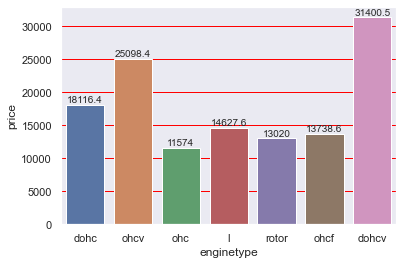

In [27]:

enginetype_data = sns.barplot(x="enginetype", y="price", data=cars_data, errwidth=0)
for i in enginetype_data.containers:
    enginetype_data.bar_label(i, )

### enginetype

#### dohc  -> 18.12
#### dohcv -> 31.40
#### l  -> 14.63
#### ohc -> 11.57
#### ohcf  -> 13.74
#### ohcv -> 25.10
#### rotor  -> 13.02


In [28]:
cars_data['enginetype'].replace({'dohc':18.12, 'dohcv':31.40,'l':14.63, 'ohc':11.57,'ohcf':13.74, 'ohcv':25.10,'rotor':13.02} ,inplace=True)

#### investigating fuelsystem categorical data

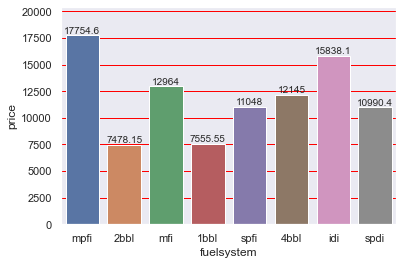

In [29]:

fuelsystem_data = sns.barplot(x="fuelsystem", y="price", data=cars_data, errwidth=0)
for i in fuelsystem_data.containers:
    fuelsystem_data.bar_label(i, )

### fuelsystem

#### 1bbl  -> 7.56
#### 2bbl -> 7.48
#### 4bbl  -> 12.15
#### idi -> 15.84
#### mfi  -> 12.96
#### mpfi -> 17.75
#### spdi  -> 10.99
#### spfi  -> 11.05

In [30]:
cars_data['fuelsystem'].replace({'1bbl':7.56, '2bbl': 7.48, '4bbl':12.15,'idi':15.84, 'mfi':12.96,'mpfi':17.75, 'spdi':10.99,'spfi':11.05} ,inplace=True)

#### investigating cylindernumber categorical data

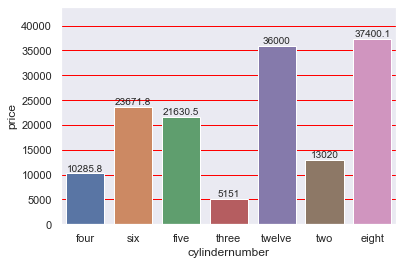

In [31]:
# investigating categorical data
cylindernumber_data = sns.barplot(x="cylindernumber", y="price", data=cars_data, errwidth=0 )
for i in cylindernumber_data.containers:
    cylindernumber_data.bar_label(i, )

#### For the cylinder numbers, we assign values corresponding with the number

In [32]:
cars_data['cylindernumber'].replace({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12} ,inplace=True)                  


#### Check whether there are any other categorical variables

In [33]:
for column in cars_data:
    unique_values = np.unique(cars_data[column])
    number_of_column_features = len(unique_values)
    if number_of_column_features < 10:
        print('number of values for  {} : {} ------ {}' .format(column,  number_of_column_features, unique_values))
        
    else:
        print('The number of values for {} : {}' . format(column, number_of_column_features))

The number of values for car_ID : 205
number of values for  symboling : 6 ------ [-2 -1  0  1  2  3]
The number of values for CarName : 147
number of values for  fueltype : 2 ------ [13.   15.84]
number of values for  aspiration : 2 ------ [12.3  12.61]
number of values for  doornumber : 2 ------ [12.99 13.5 ]
number of values for  carbody : 5 ------ [10.38 12.37 14.34 21.89 22.21]
number of values for  drivewheel : 3 ------ [ 9.24 11.09 19.91]
number of values for  enginelocation : 2 ------ [12.96 34.52]
The number of values for wheelbase : 53
The number of values for carlength : 75
The number of values for carwidth : 44
The number of values for carheight : 49
The number of values for curbweight : 171
number of values for  enginetype : 7 ------ [11.57 13.02 13.74 14.63 18.12 25.1  31.4 ]
number of values for  cylindernumber : 7 ------ [ 2  3  4  5  6  8 12]
The number of values for enginesize : 44
number of values for  fuelsystem : 8 ------ [ 7.48  7.56 10.99 11.05 12.15 12.96 15.84 1

#### Delete car_ID, symboling and carname

In [34]:
columns_to_be_deleted = 'car_ID', 'symboling', 'CarName'

c = list(columns_to_be_deleted)

c

['car_ID', 'symboling', 'CarName']

In [35]:
cars_data = cars_data.drop(columns = c, axis = 1)

In [36]:
cars_data

fueltype  aspiration  doornumber  carbody  drivewheel  enginelocation  \
0       13.00       12.61       12.99    21.89       19.91           12.96   
1       13.00       12.61       12.99    21.89       19.91           12.96   
2       13.00       12.61       12.99    10.38       19.91           12.96   
3       13.00       12.61       13.50    14.34        9.24           12.96   
4       13.00       12.61       13.50    14.34       11.09           12.96   
..        ...         ...         ...      ...         ...             ...   
200     13.00       12.61       13.50    14.34       19.91           12.96   
201     13.00       12.30       13.50    14.34       19.91           12.96   
202     13.00       12.61       13.50    14.34       19.91           12.96   
203     15.84       12.30       13.50    14.34       19.91           12.96   
204     13.00       12.30       13.50    14.34       19.91           12.96   

     wheelbase  carlength  carwidth  carheight  curbweight  enginetype  \
0         88.6      168.8      64.1       48.8        2548       18.12   
1         88.6      168.8      64.1       48.8        2548       18.12   
2         94.5      171.2      65.5       52.4        2823       25.10   
3         99.8      176.6      66.2       54.3        2337       11.57   
4         99.4      176.6      66.4       54.3        2824       11.57   
..         ...        ...       ...        ...         ...         ...   
200      109.1      188.8      68.9       55.5        2952       11.57   
201      109.1      188.8      68.8       55.5        3049       11.57   
202      109.1      188.8      68.9       55.5        3012       25.10   
203      109.1      188.8      68.9       55.5        3217       11.57   
204      109.1      188.8      68.9       55.5        3062       11.57   

     cylindernumber  enginesize  fuelsystem  boreratio  stroke  \
0                 4         130       17.75       3.47    2.68   
1                 4         130       17.75       3.47    2.68   
2                 6         152       17.75       2.68    3.47   
3                 4         109       17.75       3.19    3.40   
4                 5         136       17.75       3.19    3.40   
..              ...         ...         ...        ...     ...   
200               4         141       17.75       3.78    3.15   
201               4         141       17.75       3.78    3.15   
202               6         173       17.75       3.58    2.87   
203               6         145       15.84       3.01    3.40   
204               4         141       17.75       3.78    3.15   

     compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0                 9.0         111     5000       21          27  13495.0  
1                 9.0         111     5000       21          27  16500.0  
2                 9.0         154     5000       19          26  16500.0  
3                10.0         102     5500       24          30  13950.0  
4                 8.0         115     5500       18          22  17450.0  
..                ...         ...      ...      ...         ...      ...  
200               9.5         114     5400       23          28  16845.0  
201               8.7         160     5300       19          25  19045.0  
202               8.8         134     5500       18          23  21485.0  
203              23.0         106     4800       26          27  22470.0  
204               9.5         114     5400       19          25  22625.0  

[205 rows x 23 columns]

### Investigating the distribution and outliers with box plots

#### The center line is the median
#### The box in the middle shows the beginning of the 25%tile and the end of 75%tile
#### The whiskers in the left and right shows the minimum and maximum quatile
#### The dots on either sides are the outliers

The median is : 10295.0


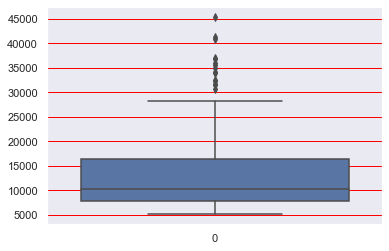

In [37]:
x_axis = cars_data['price'].values
ax = sns.boxplot(x_axis)

print('The median is :', cars_data['price'].median())


#### investigate the outliers in all columns

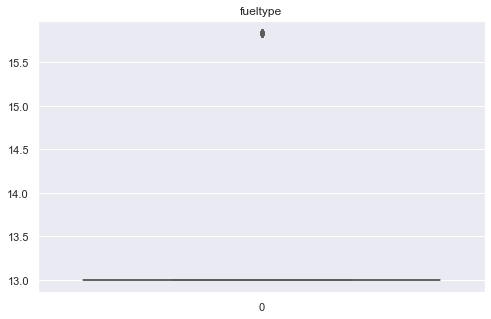

The median of: fueltype is 13.0
************************************************


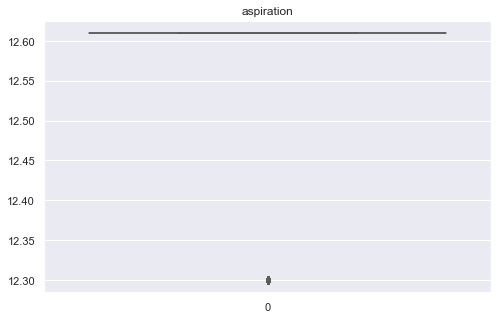

The median of: aspiration is 12.61
************************************************


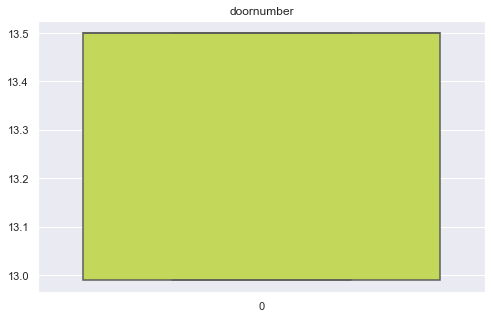

The median of: doornumber is 13.5
************************************************


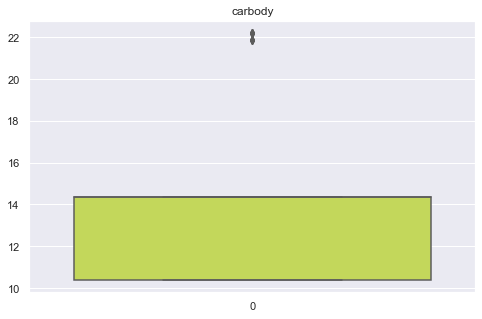

The median of: carbody is 14.34
************************************************


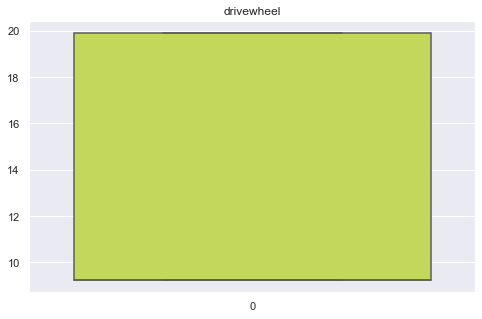

The median of: drivewheel is 9.24
************************************************


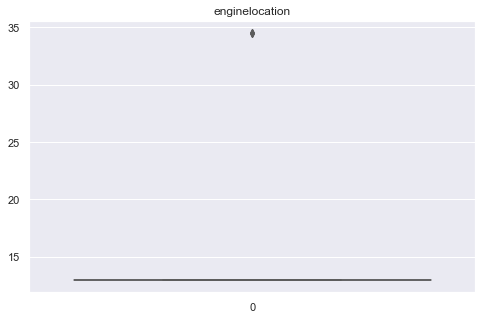

The median of: enginelocation is 12.96
************************************************


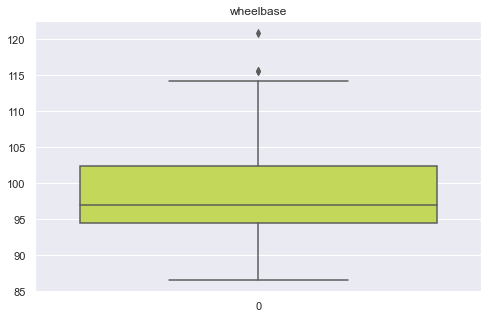

The median of: wheelbase is 97.0
************************************************


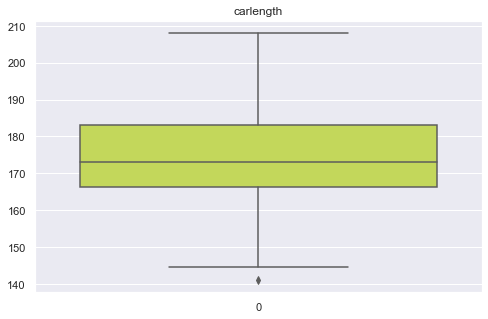

The median of: carlength is 173.2
************************************************


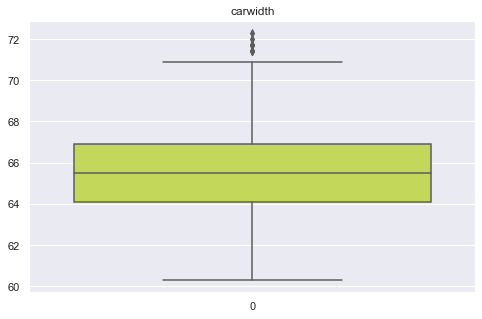

The median of: carwidth is 65.5
************************************************


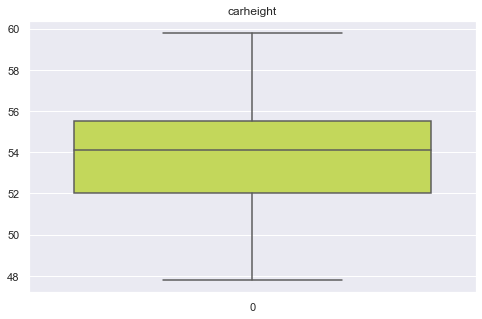

The median of: carheight is 54.1
************************************************


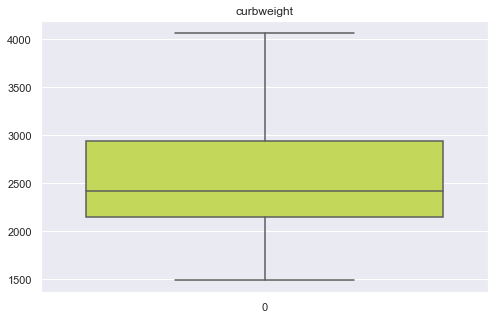

The median of: curbweight is 2414.0
************************************************


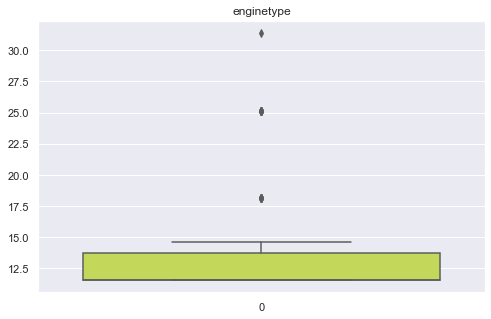

The median of: enginetype is 11.57
************************************************


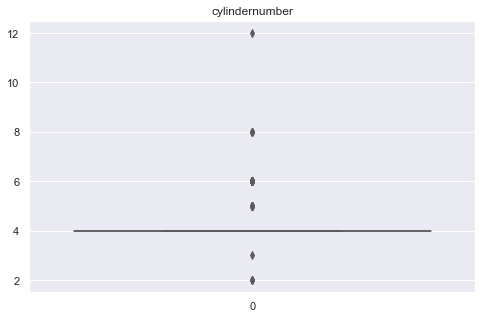

The median of: cylindernumber is 4.0
************************************************


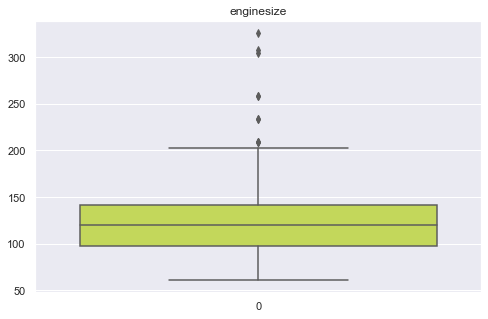

The median of: enginesize is 120.0
************************************************


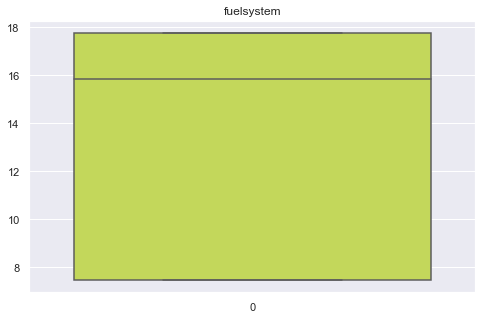

The median of: fuelsystem is 15.84
************************************************


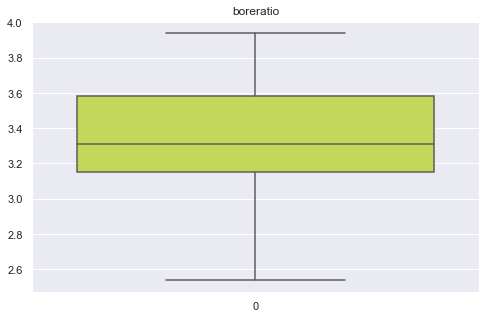

The median of: boreratio is 3.31
************************************************


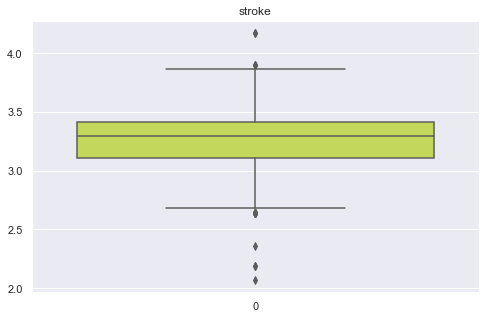

The median of: stroke is 3.29
************************************************


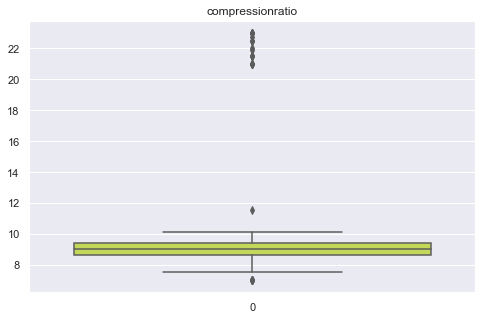

The median of: compressionratio is 9.0
************************************************


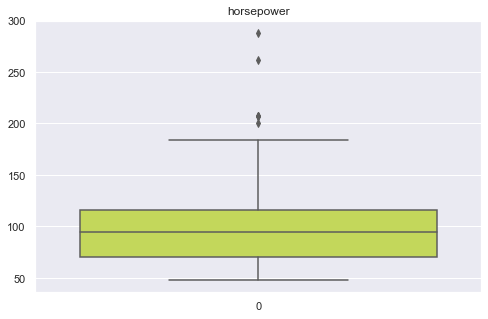

The median of: horsepower is 95.0
************************************************


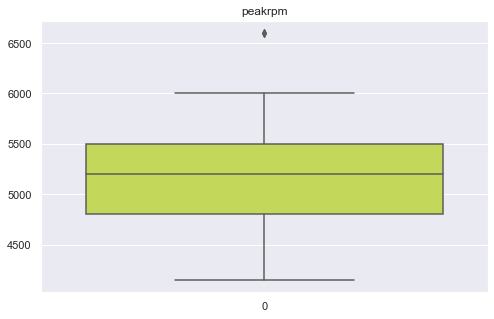

The median of: peakrpm is 5200.0
************************************************


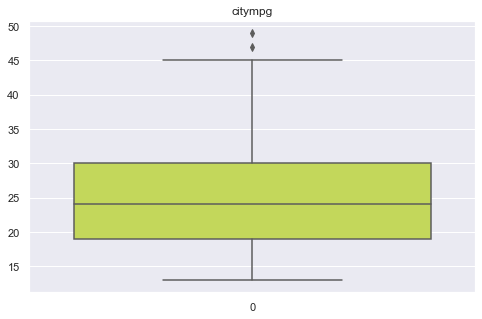

The median of: citympg is 24.0
************************************************


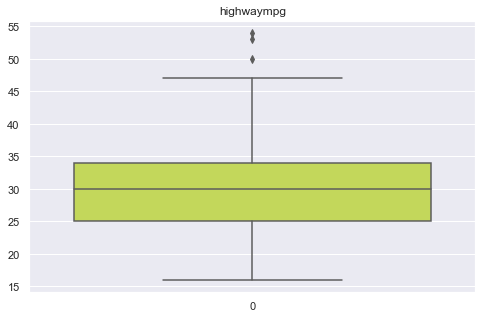

The median of: highwaympg is 30.0
************************************************


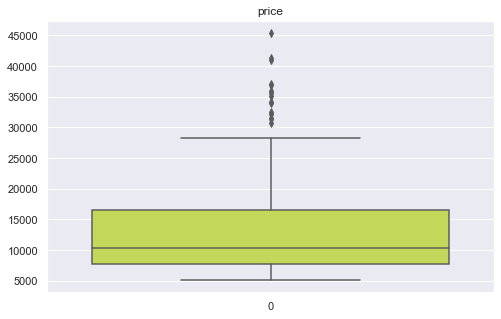

The median of: price is 10295.0
************************************************


In [38]:
sns.set(rc={'figure.figsize':(8,5)})
for feature in cars_data.columns:
    x = cars_data[feature].values
    ax = sns.boxplot(x, color ='#D1EC46')
    plt.title(feature)
    plt.show()
    print('The median of:',feature, 'is' , cars_data[feature].median())
    print('************************************************')
    


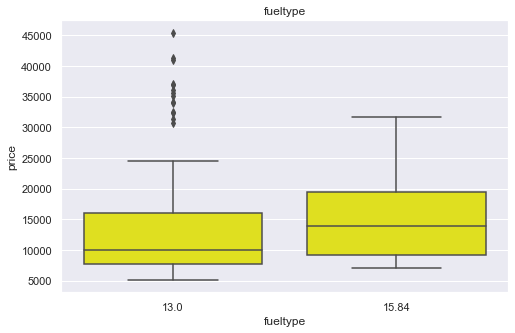

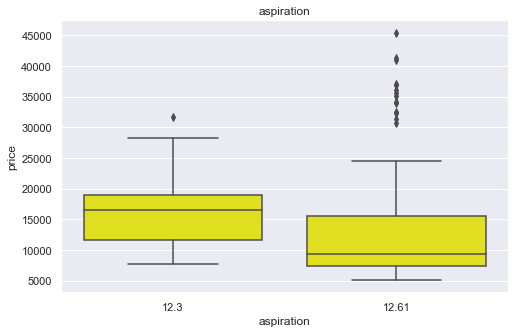

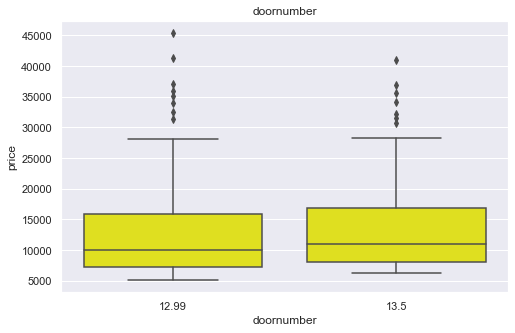

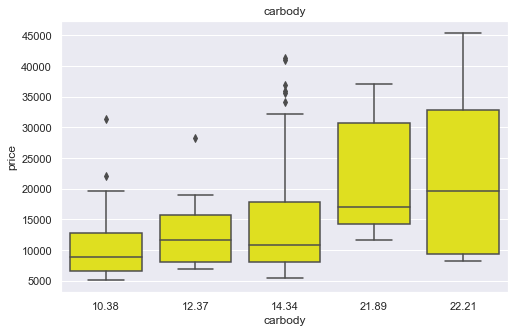

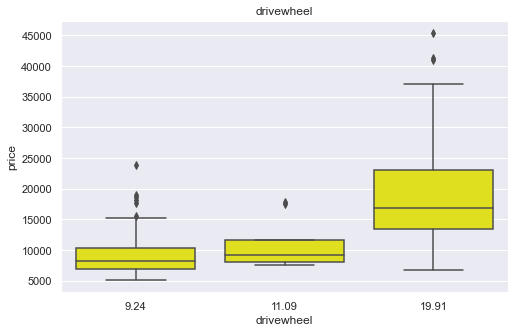

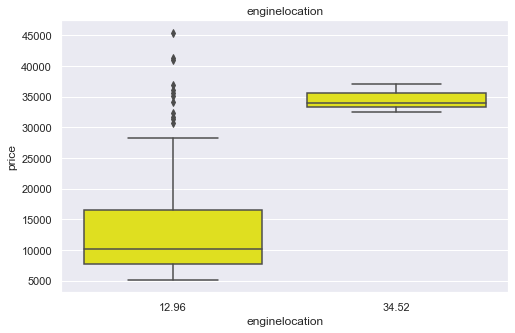

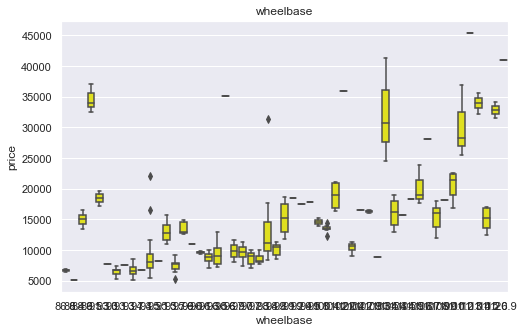

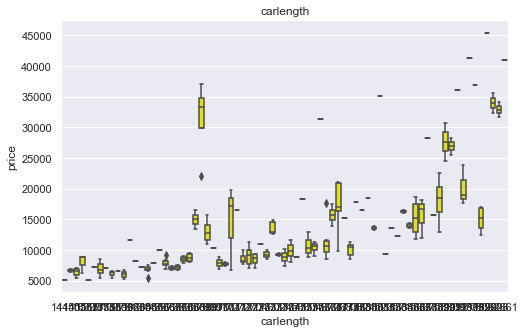

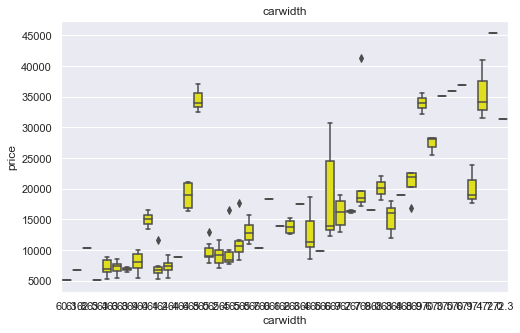

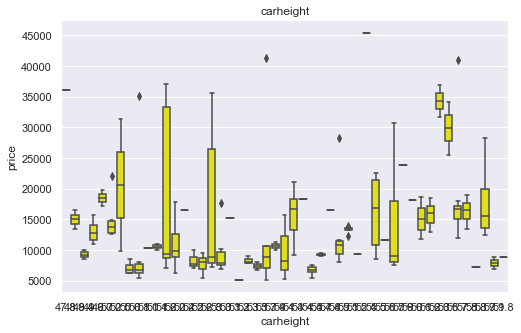

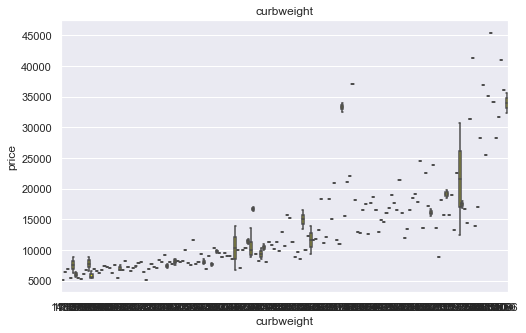

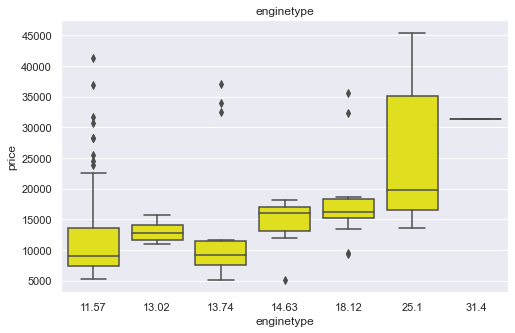

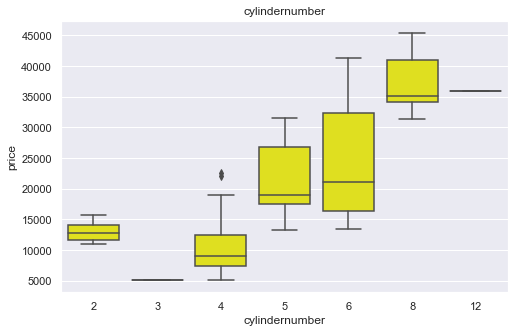

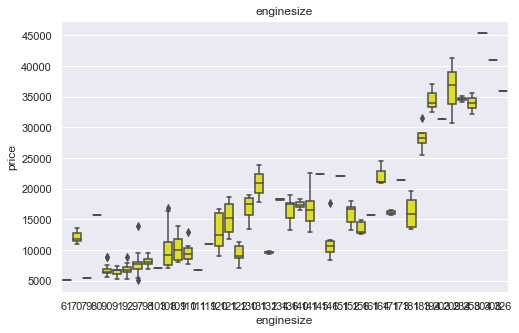

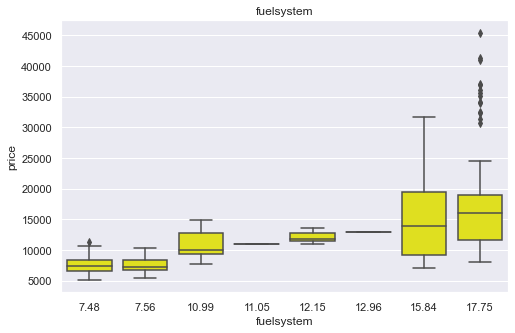

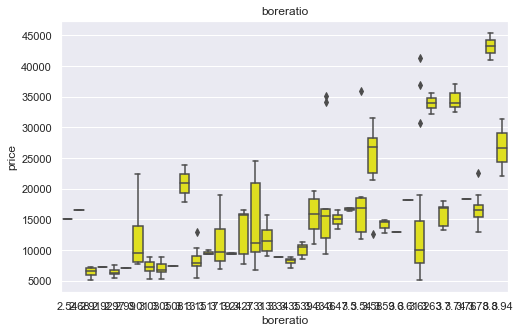

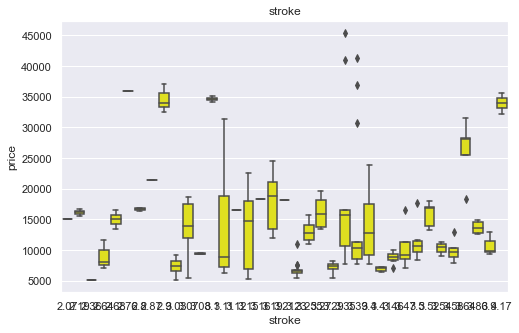

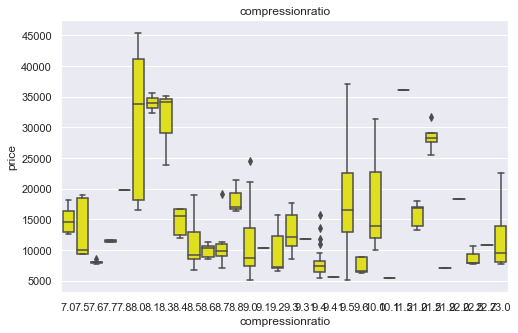

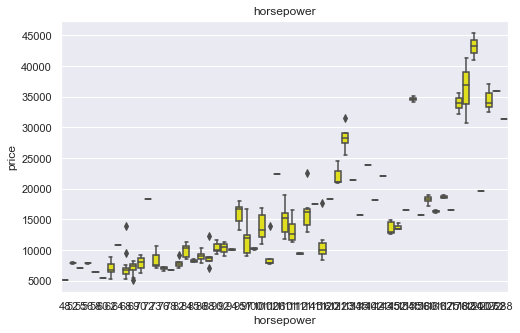

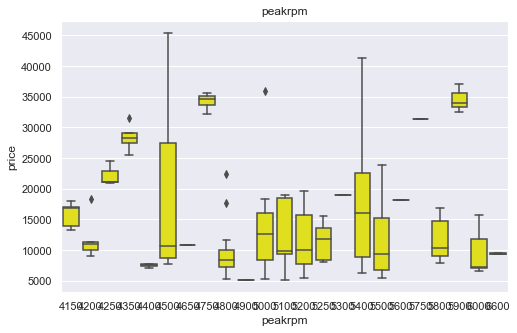

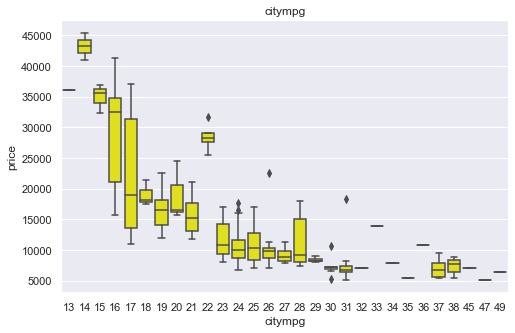

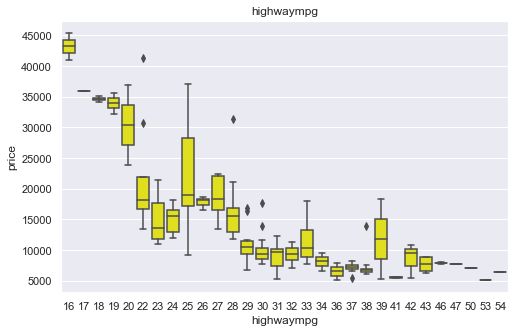

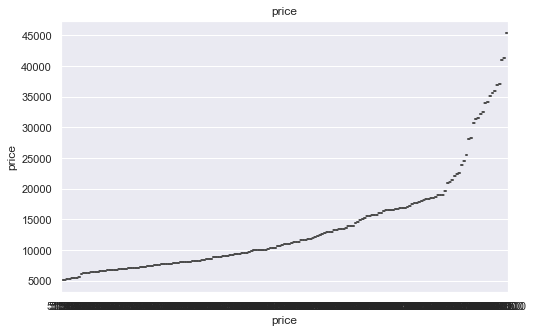

In [39]:
sns.set(rc={'figure.figsize':(8,5)})
for cars in cars_data.columns:
    ax = sns.boxplot(x=cars, y="price", data=cars_data, color='yellow')
    plt.title(cars)
    plt.show()

#### We dont have much outliers in our dataset

In [40]:
cars_data.head().T

0         1         2         3         4
fueltype             13.00     13.00     13.00     13.00     13.00
aspiration           12.61     12.61     12.61     12.61     12.61
doornumber           12.99     12.99     12.99     13.50     13.50
carbody              21.89     21.89     10.38     14.34     14.34
drivewheel           19.91     19.91     19.91      9.24     11.09
enginelocation       12.96     12.96     12.96     12.96     12.96
wheelbase            88.60     88.60     94.50     99.80     99.40
carlength           168.80    168.80    171.20    176.60    176.60
carwidth             64.10     64.10     65.50     66.20     66.40
carheight            48.80     48.80     52.40     54.30     54.30
curbweight         2548.00   2548.00   2823.00   2337.00   2824.00
enginetype           18.12     18.12     25.10     11.57     11.57
cylindernumber        4.00      4.00      6.00      4.00      5.00
enginesize          130.00    130.00    152.00    109.00    136.00
fuelsystem           17.75     17.75     17.75     17.75     17.75
boreratio             3.47      3.47      2.68      3.19      3.19
stroke                2.68      2.68      3.47      3.40      3.40
compressionratio      9.00      9.00      9.00     10.00      8.00
horsepower          111.00    111.00    154.00    102.00    115.00
peakrpm            5000.00   5000.00   5000.00   5500.00   5500.00
citympg              21.00     21.00     19.00     24.00     18.00
highwaympg           27.00     27.00     26.00     30.00     22.00
price             13495.00  16500.00  16500.00  13950.00  17450.00

### Our data is now clean and ready for feature selection

# Selecting important features

#### we need to display the dataset on a heatmap. 
#### Correlation is used to find pairwise relationship between all columns
#### The closer to 1 or -1, the better. 


In [41]:
list(cars_data.columns)

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

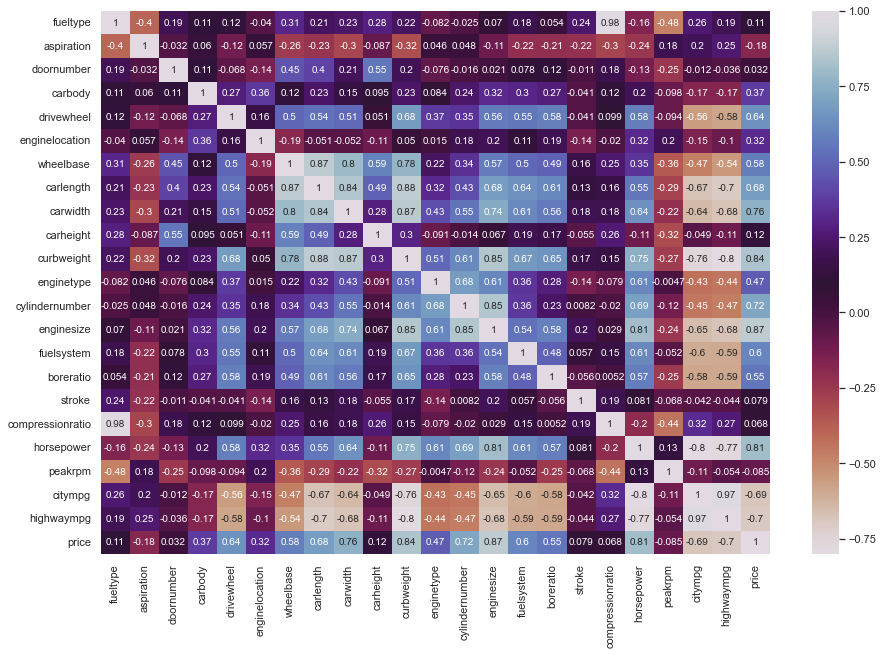

In [42]:
sns.set(rc={'figure.figsize':(15,10)})
ml_correlation_variables = ['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']
peason_correlation = cars_data.corr(method='pearson')
cols = ml_correlation_variables
ax = sns.heatmap(peason_correlation, annot=True, yticklabels=cols, xticklabels=cars_data.columns, annot_kws={'size':10}, cmap='twilight_r')

<Axes: >

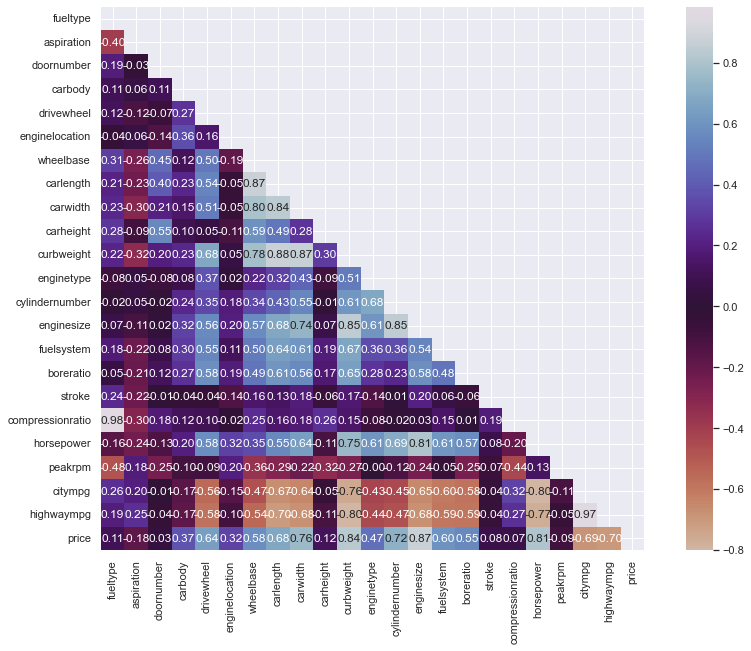

In [43]:
# create a mask to remove the top matrix as can be distracting
cmap='twilight_r'
sns.set(rc={'figure.figsize':(15,10)})
mask = np.triu(np.ones_like(peason_correlation, dtype = bool))
sns.heatmap(peason_correlation, mask=mask, center=0, annot=True, fmt='.2f', square=True,cmap=cmap)

## Features with strong correlation to the price
##### 'drivewheel' 0.64
##### 'wheelbase' 0.58
##### 'carlength' 0.68
##### 'carwidth' 0.76
##### 'curbweight' 0.84
##### 'cylindernumber' 0.72
##### 'enginesize' 0.87
##### 'fuelsystem' 0.60
##### 'boreratio' 0.55
##### 'horsepower' 0.81
##### 'citympg' -0.69
##### 'highwaympg' -0.70


#### citympg and highwaympg have almost equal negative correlation hence we only choose one of them. ->  highwaympg

In [44]:
selected_features = 'drivewheel','wheelbase' ,'carlength' ,'carwidth' ,'curbweight' ,'cylindernumber' ,'enginesize' ,'fuelsystem' ,'boreratio' ,'horsepower' ,'highwaympg' 

In [45]:
c = list(selected_features)
c.append('price')
c

['drivewheel',
 'wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'horsepower',
 'highwaympg',
 'price']

In [46]:
Selected_final_dataset = cars_data[c]

In [47]:
Selected_final_dataset

drivewheel  wheelbase  carlength  carwidth  curbweight  cylindernumber  \
0         19.91       88.6      168.8      64.1        2548               4   
1         19.91       88.6      168.8      64.1        2548               4   
2         19.91       94.5      171.2      65.5        2823               6   
3          9.24       99.8      176.6      66.2        2337               4   
4         11.09       99.4      176.6      66.4        2824               5   
..          ...        ...        ...       ...         ...             ...   
200       19.91      109.1      188.8      68.9        2952               4   
201       19.91      109.1      188.8      68.8        3049               4   
202       19.91      109.1      188.8      68.9        3012               6   
203       19.91      109.1      188.8      68.9        3217               6   
204       19.91      109.1      188.8      68.9        3062               4   

     enginesize  fuelsystem  boreratio  horsepower  highwaympg    price  
0           130       17.75       3.47         111          27  13495.0  
1           130       17.75       3.47         111          27  16500.0  
2           152       17.75       2.68         154          26  16500.0  
3           109       17.75       3.19         102          30  13950.0  
4           136       17.75       3.19         115          22  17450.0  
..          ...         ...        ...         ...         ...      ...  
200         141       17.75       3.78         114          28  16845.0  
201         141       17.75       3.78         160          25  19045.0  
202         173       17.75       3.58         134          23  21485.0  
203         145       15.84       3.01         106          27  22470.0  
204         141       17.75       3.78         114          25  22625.0  

[205 rows x 12 columns]

#### The final dataset is now complete. We take 20% for the final testing of the model and save it as test_dataset

In [48]:
#Selected_final_dataset.to_csv('Selected_final_dataset.csv')

In [49]:
### Upload the final dataset

In [50]:
ml_cars_dataset = pd.read_csv(r'C:\Users\Scofield\MACHINE LEARNING PROJECTS\Car Price Prediction Model\Selected_final_dataset.csv')

In [51]:
ml_cars_dataset

drivewheel  wheelbase  carlength  carwidth  curbweight  cylindernumber  \
0         19.91       88.6      168.8      64.1        2548               4   
1         19.91       88.6      168.8      64.1        2548               4   
2         19.91       94.5      171.2      65.5        2823               6   
3          9.24       99.8      176.6      66.2        2337               4   
4         11.09       99.4      176.6      66.4        2824               5   
..          ...        ...        ...       ...         ...             ...   
180       19.91      104.5      187.8      66.5        3131               6   
181       19.91      104.5      187.8      66.5        3151               6   
182        9.24       97.3      171.7      65.5        2261               4   
183        9.24       97.3      171.7      65.5        2209               4   
184        9.24       97.3      171.7      65.5        2264               4   

     enginesize  fuelsystem  boreratio  horsepower  highwaympg    price  
0           130       17.75       3.47         111          27  13495.0  
1           130       17.75       3.47         111          27  16500.0  
2           152       17.75       2.68         154          26  16500.0  
3           109       17.75       3.19         102          30  13950.0  
4           136       17.75       3.19         115          22  17450.0  
..          ...         ...        ...         ...         ...      ...  
180         171       17.75       3.27         156          24  15690.0  
181         161       17.75       3.27         156          24  15750.0  
182          97       15.84       3.01          52          46   7775.0  
183         109       17.75       3.19          85          34   7975.0  
184          97       15.84       3.01          52          46   7995.0  

[185 rows x 12 columns]

### Split the dataset into X and Y 

In [52]:
Y = ml_cars_dataset['price'].astype(int)
X = ml_cars_dataset.drop(['price'], axis=1)

In [53]:
X

drivewheel  wheelbase  carlength  carwidth  curbweight  cylindernumber  \
0         19.91       88.6      168.8      64.1        2548               4   
1         19.91       88.6      168.8      64.1        2548               4   
2         19.91       94.5      171.2      65.5        2823               6   
3          9.24       99.8      176.6      66.2        2337               4   
4         11.09       99.4      176.6      66.4        2824               5   
..          ...        ...        ...       ...         ...             ...   
180       19.91      104.5      187.8      66.5        3131               6   
181       19.91      104.5      187.8      66.5        3151               6   
182        9.24       97.3      171.7      65.5        2261               4   
183        9.24       97.3      171.7      65.5        2209               4   
184        9.24       97.3      171.7      65.5        2264               4   

     enginesize  fuelsystem  boreratio  horsepower  highwaympg  
0           130       17.75       3.47         111          27  
1           130       17.75       3.47         111          27  
2           152       17.75       2.68         154          26  
3           109       17.75       3.19         102          30  
4           136       17.75       3.19         115          22  
..          ...         ...        ...         ...         ...  
180         171       17.75       3.27         156          24  
181         161       17.75       3.27         156          24  
182          97       15.84       3.01          52          46  
183         109       17.75       3.19          85          34  
184          97       15.84       3.01          52          46  

[185 rows x 11 columns]

In [54]:
Y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
180    15690
181    15750
182     7775
183     7975
184     7995
Name: price, Length: 185, dtype: int32

#### Split the datasets into training and testing chunks

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8, test_size=0.2, random_state=15)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(148, 11)
(37, 11)
(148,)
(37,)


# MODEL SELECTION

In [56]:
models = [
    GradientBoostingRegressor(random_state = 0),
    LinearRegression(),
    RandomForestRegressor()
]

In [57]:
def compare_models_with_train_test_split():
    for model in models:
        model.fit(X_train, Y_train)
        prediction = model.predict(X_train)
        print('The accuracy on training dataset for ----',model, 'is ----', model.score(X_train,Y_train) )   
        print('R2 score on training data prediction for',model, 'is ----', r2_score(Y_train, prediction))

        print('Accuracy on testing data for ',model, 'is ----',  model.score(X_test, Y_test))

        print('The Mean Squared Error on training data for',model, 'is ----',  sqrt(mean_squared_error(Y_train, prediction)))
        print('The Mean Squared Error on testing data  for ',model ,'is ----',sqrt(mean_squared_error(Y_test, model.predict(X_test)))) 

        print('The Mean Absolute Error on training data  for',model, 'is ----',mean_absolute_error(Y_train, prediction)) 
        print('The Mean Absolute Error on testing data for ',model, 'is ----', mean_absolute_error(Y_test, model.predict(X_test)))
        print('*******************************************************************************************************************8')

        

In [58]:
compare_models_with_train_test_split()

The accuracy on training dataset for ---- GradientBoostingRegressor(random_state=0) is ---- 0.9928582206078033
R2 score on training data prediction for GradientBoostingRegressor(random_state=0) is ---- 0.9928582206078033
Accuracy on testing data for  GradientBoostingRegressor(random_state=0) is ---- 0.9621379957327362
The Mean Squared Error on training data for GradientBoostingRegressor(random_state=0) is ---- 656.1448523690126
The Mean Squared Error on testing data  for  GradientBoostingRegressor(random_state=0) is ---- 1900.0046644898264
The Mean Absolute Error on training data  for GradientBoostingRegressor(random_state=0) is ---- 498.4007425104343
The Mean Absolute Error on testing data for  GradientBoostingRegressor(random_state=0) is ---- 1334.0193904673176
*******************************************************************************************************************8
The accuracy on training dataset for ---- LinearRegression() is ---- 0.836425843564541
R2 score on training d

### RandomForestRegressor() and GradientBoostingRegressor are so far performing well with train_test_split

In [59]:
def compare_models_with_cross_validation():
    for model in models:
        cv_score = cross_val_score(model, X, Y, cv = 5)
        mean_accuracy = sum(cv_score) / len(cv_score)
        mean_accuracy = mean_accuracy * 100
        mean_accuracy = round(mean_accuracy, 2)
        print('Accuracy of ', model , 'is ---', cv_score)
        print('Mean accuracy of ', model , 'is ---', mean_accuracy)
        print('****************************************************g')

In [60]:
compare_models_with_cross_validation()


Accuracy of  GradientBoostingRegressor(random_state=0) is --- [ 0.82434189  0.87472322  0.3333381   0.86485795 -0.00259611]
Mean accuracy of  GradientBoostingRegressor(random_state=0) is --- 57.89
****************************************************g
Accuracy of  LinearRegression() is --- [ 0.7772452   0.8335155   0.59626444  0.53754118 -2.4334755 ]
Mean accuracy of  LinearRegression() is --- 6.22
****************************************************g
Accuracy of  RandomForestRegressor() is --- [0.82884409 0.86872177 0.12385051 0.89921959 0.35911361]
Mean accuracy of  RandomForestRegressor() is --- 61.59
****************************************************g


# HYPERPARAMETER OPTIMIZATION

#### GridSearchCV for random_forest_regressor

In [61]:
random_forest_regressor_hyperparameters = {
    'max_depth' : [1,2,3,4,5,6,8] ,
    'n_estimators' : [80, 90, 100, 110, 120],
    'max_features' : [2,3,4,5]
    
}

model = RandomForestRegressor()

ideal_classifier = GridSearchCV(model, random_forest_regressor_hyperparameters, cv=5 )

ideal_classifier.fit(X, Y)

best_hyperparameters = ideal_classifier.best_params_
print(best_hyperparameters)

{'max_depth': 4, 'max_features': 3, 'n_estimators': 110}


#### random_forest_regressor best hyperparameters
#### {'max_depth': 3, 'max_features': 3, 'n_estimators': 100}

####  GridSearchCV for GradientBoostingRegressor

In [62]:
gradient_boosting_regressor_hyperparameters = {
    'loss' : ['huber', 
             'quantile'],
    'learning_rate' : [0.05, 0.08, 0.1, 0.2, 0.3],
    'min_samples_split' : [2,3,4,5,6],
    'max_depth' : [2,3,4,5,6]    
}

model = GradientBoostingRegressor()

ideal_classifier =  GridSearchCV(model, gradient_boosting_regressor_hyperparameters, cv=5 )

ideal_classifier.fit(X_train, Y_train)

best_hyperparameters = ideal_classifier.best_params_
print(best_hyperparameters)

{'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 6, 'min_samples_split': 4}


#### GradientBoostingRegressor best hyperparameters
#### {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 6, 'min_samples_split': 4}

# New parameterized models

In [63]:
new_models = [
    GradientBoostingRegressor(learning_rate = 0.1, loss= 'huber', max_depth= 6, min_samples_split= 4),
    RandomForestRegressor(max_depth= 3, max_features= 3, n_estimators= 100)
]

In [64]:
def compare_new_models_with_train_test_split():
    for model in new_models:
        model.fit(X_train, Y_train)
        prediction = model.predict(X_train)
        print('The accuracy on training dataset for ----',model, 'is ----', model.score(X_train,Y_train) )   
        print('R2 score on training data prediction for',model, 'is ----', r2_score(Y_train, prediction))

        print('Accuracy on testing data for ',model, 'is ----',  model.score(X_test, Y_test))

        print('The Mean Squared Error on training data for',model, 'is ----',  sqrt(mean_squared_error(Y_train, prediction)))
        print('The Mean Squared Error on testing data  for ',model ,'is ----',sqrt(mean_squared_error(Y_test, model.predict(X_test)))) 

        print('The Mean Absolute Error on training data  for',model, 'is ----',mean_absolute_error(Y_train, prediction)) 
        print('The Mean Absolute Error on testing data for ',model, 'is ----', mean_absolute_error(Y_test, model.predict(X_test)))
        print('******************************************************************************************************************')

        

In [65]:
compare_new_models_with_train_test_split()

The accuracy on training dataset for ---- GradientBoostingRegressor(loss='huber', max_depth=6, min_samples_split=4) is ---- 0.9982907115023312
R2 score on training data prediction for GradientBoostingRegressor(loss='huber', max_depth=6, min_samples_split=4) is ---- 0.9982907115023312
Accuracy on testing data for  GradientBoostingRegressor(loss='huber', max_depth=6, min_samples_split=4) is ---- 0.9554649281676152
The Mean Squared Error on training data for GradientBoostingRegressor(loss='huber', max_depth=6, min_samples_split=4) is ---- 320.9993815541461
The Mean Squared Error on testing data  for  GradientBoostingRegressor(loss='huber', max_depth=6, min_samples_split=4) is ---- 2060.6486346509137
The Mean Absolute Error on training data  for GradientBoostingRegressor(loss='huber', max_depth=6, min_samples_split=4) is ---- 140.21039021793817
The Mean Absolute Error on testing data for  GradientBoostingRegressor(loss='huber', max_depth=6, min_samples_split=4) is ---- 1436.2076638856693
*

In [66]:
def compare_new_models_with_cross_validation():
    for model in new_models:
        cv_score = cross_val_score(model, X, Y, cv = 10)
        mean_accuracy = sum(cv_score) / len(cv_score)
        mean_accuracy = mean_accuracy * 100
        mean_accuracy = round(mean_accuracy, 2)
        print('Accuracy of ', model , 'is ---', cv_score)
        print('Mean accuracy of ', model , 'is ---', mean_accuracy)
        print('****************************************************g')

In [67]:
compare_new_models_with_cross_validation()

Accuracy of  GradientBoostingRegressor(loss='huber', max_depth=6, min_samples_split=4) is --- [ 0.58014256  0.56456466  0.94076506  0.46539166  0.63972982 -5.3438181
  0.80347025  0.27343388 -1.65322551  0.2233116 ]
Mean accuracy of  GradientBoostingRegressor(loss='huber', max_depth=6, min_samples_split=4) is --- -25.06
****************************************************g
Accuracy of  RandomForestRegressor(max_depth=3, max_features=3) is --- [ 0.60288235  0.4524129   0.97981236  0.71632752  0.7622656  -2.11648839
  0.70455755  0.70611877  0.38996993  0.42928723]
Mean accuracy of  RandomForestRegressor(max_depth=3, max_features=3) is --- 36.27
****************************************************g


#### RandomForestRegressor takes the lead and has the highest accuracy score with cross validation

In [68]:
production_model = RandomForestRegressor(max_depth= 3, max_features= 3, n_estimators= 100)

In [69]:
production_model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=3, max_features=3)

# MODEL TESTING

#### Loading test data

In [70]:
unseen_test_data = pd.read_csv(r'C:\Users\Scofield\MACHINE LEARNING PROJECTS\Car Price Prediction Model\test_dataset.csv')

In [71]:
unseen_test_data

drivewheel  wheelbase  carlength  carwidth  curbweight  cylindernumber  \
0         9.24       97.3      171.7      65.5        2212               4   
1         9.24       97.3      171.7      65.5        2275               4   
2         9.24       97.3      171.7      65.5        2319               4   
3         9.24       97.3      171.7      65.5        2300               4   
4         9.24       94.5      159.3      64.2        2254               4   
5         9.24       94.5      165.7      64.0        2221               4   
6         9.24      100.4      180.2      66.9        2661               5   
7         9.24      100.4      180.2      66.9        2579               4   
8         9.24      100.4      183.1      66.9        2563               4   
9        19.91      104.3      188.8      67.2        2912               4   
10       19.91      104.3      188.8      67.2        3034               4   
11       19.91      104.3      188.8      67.2        2935               4   
12       19.91      104.3      188.8      67.2        3042               4   
13       19.91      104.3      188.8      67.2        3045               4   
14       19.91      104.3      188.8      67.2        3157               4   
15       19.91      109.1      188.8      68.9        2952               4   
16       19.91      109.1      188.8      68.8        3049               4   
17       19.91      109.1      188.8      68.9        3012               6   
18       19.91      109.1      188.8      68.9        3217               6   
19       19.91      109.1      188.8      68.9        3062               4   

    enginesize  fuelsystem  boreratio  horsepower  highwaympg  price  
0          109       17.75       3.19          85          34   8195  
1          109       17.75       3.19          85          34   8495  
2           97       15.84       3.01          68          42   9495  
3          109       17.75       3.19         100          32   9995  
4          109       17.75       3.19          90          29  11595  
5          109       17.75       3.19          90          29   9980  
6          136       17.75       3.19         110          24  13295  
7           97       15.84       3.01          68          38  13845  
8          109       17.75       3.19          88          31  12290  
9          141       17.75       3.78         114          28  12940  
10         141       17.75       3.78         114          28  13415  
11         141       17.75       3.78         114          28  15985  
12         141       17.75       3.78         114          28  16515  
13         130       17.75       3.62         162          22  18420  
14         130       17.75       3.62         162          22  18950  
15         141       17.75       3.78         114          28  16845  
16         141       17.75       3.78         160          25  19045  
17         173       17.75       3.58         134          23  21485  
18         145       15.84       3.01         106          27  22470  
19         141       17.75       3.78         114          25  22625

In [72]:
unseen_test_dataset = [
    [9.24,97.3,171.7,65.5,2212,4,109,17.75,3.19,85,34],
    [9.24,97.3,171.7,65.5,2275,4,109,17.75,3.19,85,34],
    [9.24,97.3,171.7,65.5,2319,4,97,15.84,3.01,68,42],
    [9.24,97.3,171.7,65.5,2300,4,109,17.75,3.19,100,32],
    [9.24,94.5,159.3,64.2,2254,4,109,17.75,3.19,90,29],
    [9.24,94.5,165.7,64,2221,4,109,17.75,3.19,90,29],
    [9.24,100.4,180.2,66.9,2661,5,136,17.75,3.19,110,24],
    [9.24,100.4,180.2,66.9,2579,4,97,15.84,3.01,68,38],
    [9.24,100.4,183.1,66.9,2563,4,109,17.75,3.19,88,31],
    [19.91,104.3,188.8,67.2,2912,4,141,17.75,3.78,114,28],
    [19.91,104.3,188.8,67.2,3034,4,141,17.75,3.78,114,28],
    [19.91,104.3,188.8,67.2,2935,4,141,17.75,3.78,114,28],
    [19.91,104.3,188.8,67.2,3042,4,141,17.75,3.78,114,28],
    [19.91,104.3,188.8,67.2,3045,4,130,17.75,3.62,162,22],
    [19.91,104.3,188.8,67.2,3157,4,130,17.75,3.62,162,22],
    [19.91,109.1,188.8,68.9,2952,4,141,17.75,3.78,114,28],
    [19.91,109.1,188.8,68.8,3049,4,141,17.75,3.78,160,25],
    [19.91,109.1,188.8,68.9,3012,6,173,17.75,3.58,134,23],
    [19.91,109.1,188.8,68.9,3217,6,145,15.84,3.01,106,27],
    [19.91,109.1,188.8,68.9,3062,4,141,17.75,3.78,114,25]
    
]

In [73]:
def test_production_model():
    for data in unseen_test_dataset:
        input_data_as_numpy_array = np.asarray(data)
        reshaped_input_data = input_data_as_numpy_array.reshape(1, -1)
        prediction = production_model.predict(reshaped_input_data)
        print(prediction)
        print('***********************')
       

In [74]:
test_production_model()

[8842.55505599]
***********************
[8842.55505599]
***********************
[8571.2330385]
***********************
[9744.05816343]
***********************
[8936.74714965]
***********************
[8936.74714965]
***********************
[15692.88488561]
***********************
[11541.88593769]
***********************
[11739.81167995]
***********************
[16146.5242379]
***********************
[16198.68549371]
***********************
[16146.5242379]
***********************
[16198.68549371]
***********************
[17270.96342559]
***********************
[17270.96342559]
***********************
[16145.53491679]
***********************
[17205.79634061]
***********************
[20096.09059059]
***********************
[17954.55191934]
***********************
[16390.93086137]
***********************


## The model is 93 % accurate

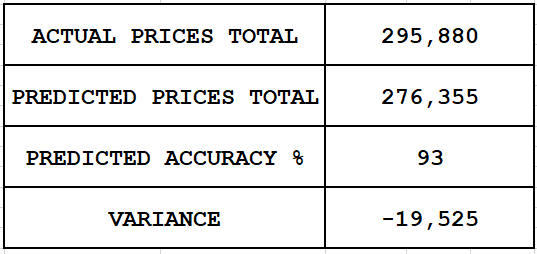

In [75]:
import pickle

In [76]:
filename = 'Car_prices_predictive_model.sav'

In [77]:
pickle.dump(production_model, open(filename , 'wb'))

In [78]:
os.getcwd()

'C:\\Users\\Scofield\\MACHINE LEARNING PROJECTS\\Car Price Prediction Model'